In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
np.random.seed(2)

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC

from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import date
from tabulate              import tabulate
from scipy.stats           import chi2_contingency
import pickle
from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.ensemble      import RandomForestRegressor
import xgboost as xgb

import random
import warnings
warnings.filterwarnings( 'ignore' )

**Load dataset**

**Hourly Energy Consumption**

In [ ]:
# downlaod kaggle data in google colab
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ieshaan","key":"7fbc92d82ae9b358a2728078f1ef90ec"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-09 20:40:01          12045  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7342  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2973  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2874  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d robikscube/hourly-energy-consumption

 61% 7.00M/11.4M [00:00<00:00, 72.2MB/s]
100% 11.4M/11.4M [00:00<00:00, 73.1MB/s]


In [ ]:
!unzip /content/hourly-energy-consumption.zip 

Archive:  /content/hourly-energy-consumption.zip
  inflating: AEP_hourly.csv          
  inflating: COMED_hourly.csv        
  inflating: DAYTON_hourly.csv       
  inflating: DEOK_hourly.csv         
  inflating: DOM_hourly.csv          
  inflating: DUQ_hourly.csv          
  inflating: EKPC_hourly.csv         
  inflating: FE_hourly.csv           
  inflating: NI_hourly.csv           
  inflating: PJME_hourly.csv         
  inflating: PJMW_hourly.csv         
  inflating: PJM_Load_hourly.csv     
  inflating: est_hourly.paruqet      
  inflating: pjm_hourly_est.csv      


In [ ]:
aep = pd.read_csv( '/content/AEP_hourly.csv', low_memory=False )
comed = pd.read_csv( '/content/COMED_hourly.csv', low_memory=False )
dayton = pd.read_csv( '/content/DAYTON_hourly.csv', low_memory=False )
deok = pd.read_csv( '/content/DEOK_hourly.csv', low_memory=False )
dom = pd.read_csv( '/content/DOM_hourly.csv', low_memory=False )
duq = pd.read_csv( '/content/DUQ_hourly.csv', low_memory=False )
ekpc = pd.read_csv( '/content/EKPC_hourly.csv', low_memory=False )
fe = pd.read_csv( '/content/FE_hourly.csv', low_memory=False )
ni = pd.read_csv( '/content/NI_hourly.csv', low_memory=False )
pjm = pd.read_csv( '/content/PJM_Load_hourly.csv', low_memory=False )
pjme = pd.read_csv( '/content/PJME_hourly.csv', low_memory=False )
pjmw = pd.read_csv( '/content/PJMW_hourly.csv', low_memory=False )

In [ ]:
# I will combine all the datasets into one. For this I will create a column in each of the datasets that will identify your respective electric company.

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [ ]:
# the column in each dataset that shows the Megawatt Energy Consumption

aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [ ]:
# Concatenate all the datasets
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw.sample(5) # check

Datetime  mw_energy_consumption electric_company
4611   2005-09-22 06:00:00                12895.0              AEP
33843  2015-09-22 08:00:00                 7328.0               FE
64651  2012-11-15 13:00:00                16108.0              AEP
83299  2014-09-30 15:00:00                 2028.0           DAYTON
25010  2014-02-23 07:00:00                 2627.0             DEOK

In [ ]:
df_raw.shape

(1090167, 3)

In [ ]:
df1 = df_raw.copy()
df1.columns

Index(['Datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [ ]:
# Only the column "Datetime" don't have the format that I want.
cols_old = ['Datetime', 'mw_energy_consumption', 'electric_company']

# If the dataset had too many columns to change I would use the "snakecase" technique through the "inflection" function. Since this dataset has only one column to change the name, I will do this process manually.
cols_new = ['datetime', 'mw_energy_consumption', 'electric_company']

# rename
df1.columns = cols_new

In [ ]:
df1.columns

Index(['datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [ ]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 1090167
Number of Cols: 3


In [ ]:
df1.dtypes
# Observe datetime. It has a different data type.

datetime                  object
mw_energy_consumption    float64
electric_company          object
dtype: object

In [ ]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
df1['datetime'] = pd.to_datetime( df1['datetime'] )

In [ ]:
df1.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object

In [ ]:
df1.isna().sum()

datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

In [ ]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = df1.select_dtypes( include=['float64'] )
cat_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

**Numerical Attibutes**

In [ ]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
stats = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
stats.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [ ]:
stats

attributes  min      max  ...           std      skew  kurtosis
0  mw_energy_consumption  0.0  62009.0  ...  10534.394704  1.356423  1.198281

[1 rows x 9 columns]

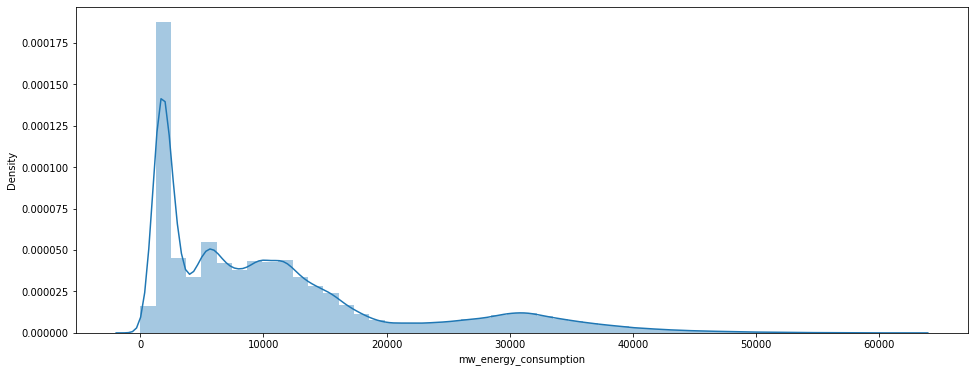

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

sns.distplot( df1['mw_energy_consumption'] )

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot( x= 'electric_company', y='mw_energy_consumption' , data=df1 )

**Feature Engineering**

In [ ]:
df2 = df1.copy()

In [ ]:
df2['date'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.date

In [ ]:
import datetime
## date
# I want to have a view of the evolution of energy consumption by looking only at the dates as information, excluding an hour when they were recorded.

df2['date'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.date

## year
# I will not directly validate any hypothesis with the date "year", but I will use this information to better visualize some variables in the validation process within the EDA.

df2['year'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.year
## month
# I will not directly validate any hypothesis with the date "month", but I will use this information to better visualize some variables in the validation process within the EDA.

df2['month'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.month
## hour_of_day:

# Initially I thought about converting the hours in the "datetime" column to float, because it would be better to visualize the energy consumption by the evolution of the hours, but observing the part of the hours in the "datetime" column we can see that all of them have only the same hour and not the minute and second. For this reason I will only create the "hour_of_day" column using the "hour" function.

df2['hour_of_day'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.hour

# season:

# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).

df2['season'] = pd.to_datetime(df2['datetime']).apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')

## holiday:

# I will use the "holidays" library to identify whether the date represents a holiday. An idea for a next cycle in the project is to differentiate, according to some rule, the different dates of the holidays.
# The documentation of this librarie is in this link: https://pypi.org/project/holidays/
# Another rule that I will use is to consider the eve of the dates as a "holiday".

df2['holidays'] = pd.to_datetime(df2['datetime']).apply( lambda x: 'Holiday' if x in holidays.US() else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

## day_of_week:

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

df2['day_of_week'] = pd.to_datetime(df2['datetime'], errors='coerce').dt.weekday

In [ ]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [ ]:
df2.sample(10)

datetime  mw_energy_consumption  ...    holidays day_of_week
13610 2003-06-12 06:00:00                27127.0  ...  Normal day           3
57385 2018-01-15 07:00:00                 3817.0  ...     Holiday           0
12803 2006-03-18 15:00:00                 9201.0  ...  Normal day           5
65    2002-12-29 18:00:00                 6178.0  ...  Normal day           6
52185 2010-09-19 23:00:00                 9908.0  ...  Normal day           6
48537 2009-02-18 21:00:00                13566.0  ...  Normal day           2
32605 2008-12-13 21:00:00                12943.0  ...  Normal day           5
52820 2010-03-23 10:00:00                 2183.0  ...  Normal day           1
4140  2005-07-12 14:00:00                16366.0  ...  Normal day           1
56498 2011-10-21 18:00:00                 1823.0  ...  Normal day           4

[10 rows x 10 columns]

In [ ]:
plt.figure(figsize=(16, 6))

sns.distplot( df2['mw_energy_consumption'], kde=False )

In [ ]:
plt.rcParams["figure.figsize"] = [20,20]
num_attributes.hist( bins=25 )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4af2bb0b50>,
      dtype=object)

In [ ]:
cat_attributes.head()

electric_company        date  season holidays
0              AEP  2004-12-31  Winter  Holiday
1              AEP  2004-12-31  Winter  Holiday
2              AEP  2004-12-31  Winter  Holiday
3              AEP  2004-12-31  Winter  Holiday
4              AEP  2004-12-31  Winter  Holiday

In [ ]:
df2['electric_company'].drop_duplicates()

0       AEP
0     COMED
0    DAYTON
0      DEOK
0       DOM
0       DUQ
0      EKPC
0        FE
0        NI
0       PJM
0      PJME
0      PJMW
Name: electric_company, dtype: object

In [ ]:
df2['season'].drop_duplicates()

0       Winter
744     Autumn
5134    Summer
7342    Spring
Name: season, dtype: object

In [ ]:
df2['holidays'].drop_duplicates()

0        Holiday
48    Normal day
Name: holidays, dtype: object

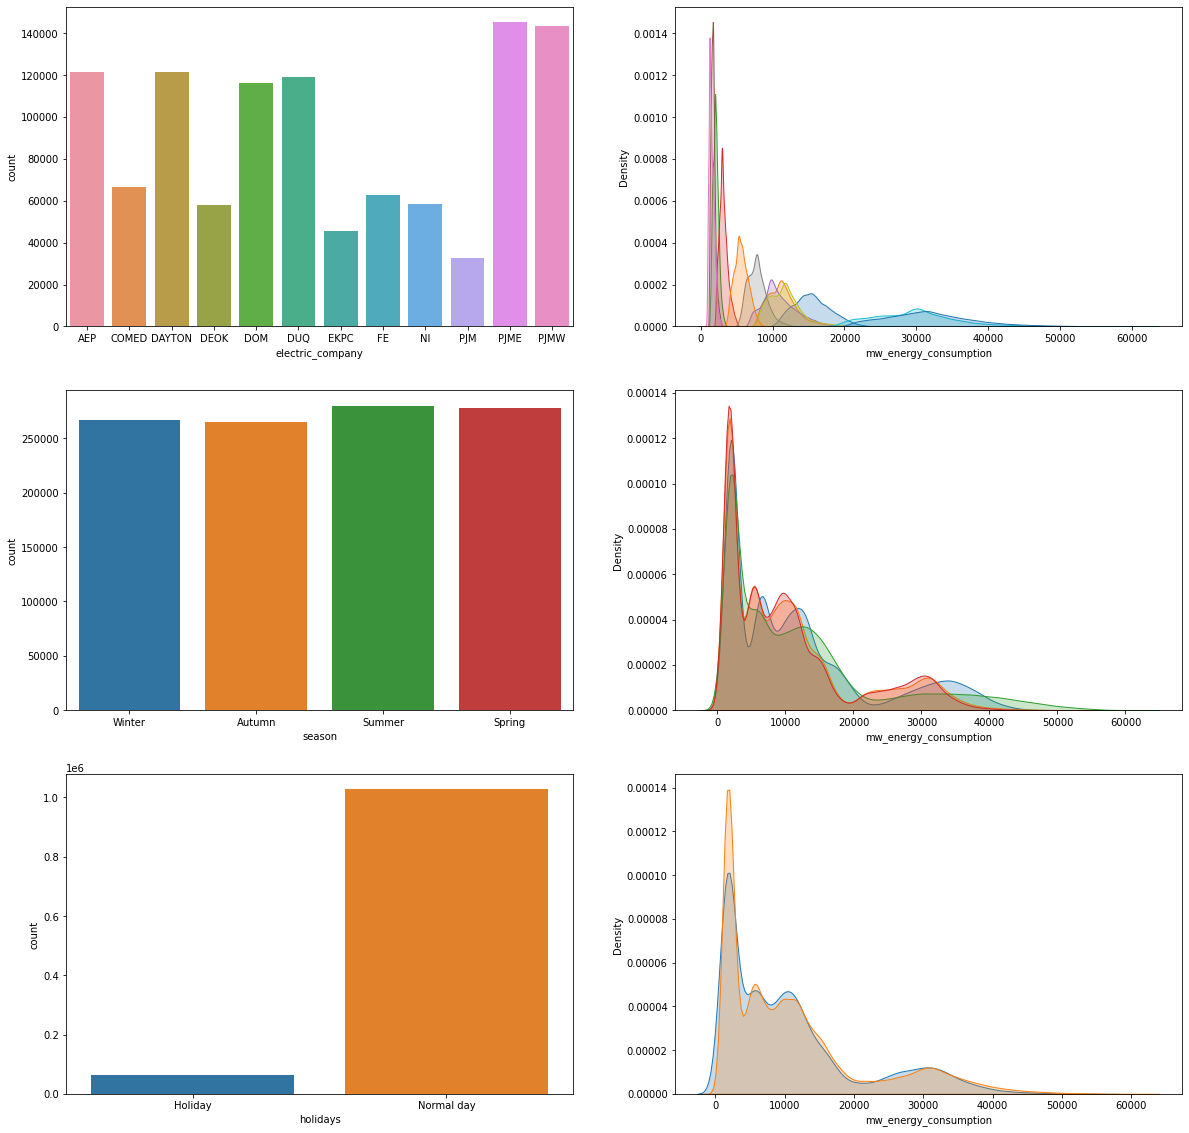

In [ ]:
# electric_company

plt.subplot( 3, 2, 1)
sns.countplot( df2['electric_company'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df2[df2['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df2[df2['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# season

plt.subplot( 3, 2, 3)
sns.countplot( df2['season'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df2[df2['season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df2[df2['season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df2[df2['season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df2[df2['season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# holidays

plt.subplot( 3, 2, 5)
sns.countplot( df2['holidays'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df2[df2['holidays'] == 'Holiday']['mw_energy_consumption'], label='Holiday', shade=True )
sns.kdeplot( df2[df2['holidays'] == 'Normal day']['mw_energy_consumption'], label='Normal day', shade=True )

**BIVARIATE ANALYSIS**

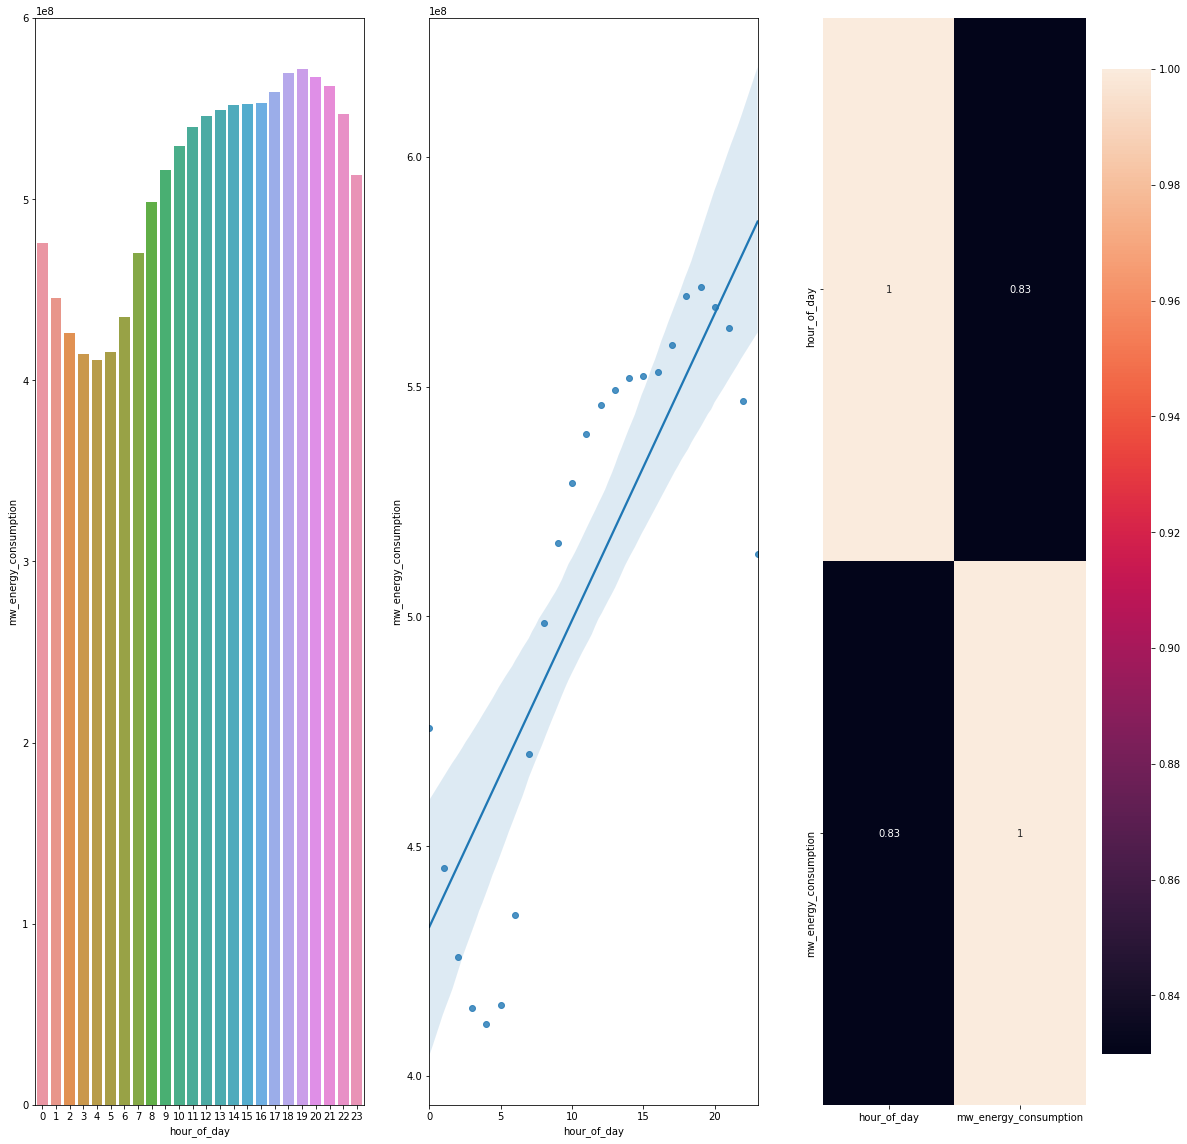

In [ ]:
plt.subplot(1,3,1)
aux1 = df2[['hour_of_day', 'mw_energy_consumption']].groupby( 'hour_of_day' ).sum().reset_index()
sns.barplot( x='hour_of_day', y='mw_energy_consumption', data=aux1)

plt.subplot(1,3,2)
sns.regplot( x='hour_of_day', y='mw_energy_consumption', data=aux1 )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

**Seasons with higher or lower temperatures use more energy**

When we see the sum of all energy consumptions, we see that winter and summer, which are the seasons with the most acute temperatures, register the highest energy consumption. 

At the same time when we spread out over the years we observe the same behavior with rare exceptions.

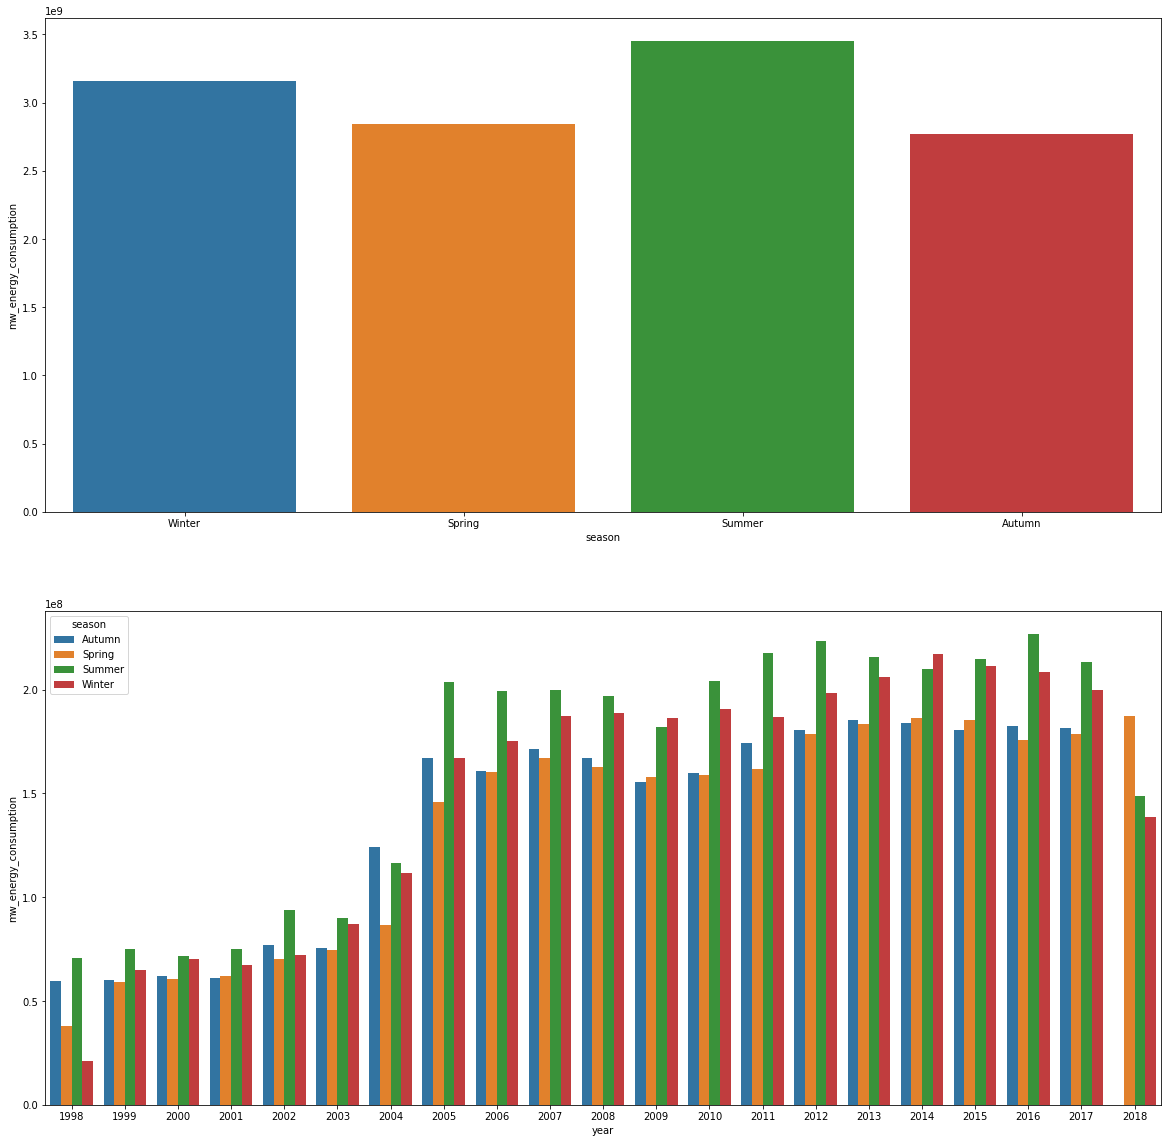

In [ ]:
aux1 = df2[['season', 'mw_energy_consumption']].groupby( 'season' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='mw_energy_consumption', data=aux1, order=['Winter', 'Spring', 'Summer', 'Autumn'] )

aux2 = df2[['year', 'season', 'mw_energy_consumption']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='season', data=aux2);

**Holiday periods spend more energy**

FALSE Holiday periods spend less energy

In [ ]:
aux1 = df2[['holidays', 'mw_energy_consumption']].groupby( 'holidays' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='holidays', y='mw_energy_consumption', data=aux1 )

aux2 = df2[['year', 'holidays', 'mw_energy_consumption']].groupby( ['year', 'holidays'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='holidays', data=aux2 );

**Weekends periods spend energy**

In [ ]:
plt.subplot( 2, 2, 1)
aux1 = df2[['day_of_week', 'mw_energy_consumption']].groupby( 'day_of_week' ).sum().reset_index()
sns.barplot( x='day_of_week', y='mw_energy_consumption', data=aux1)

aux2 = df2[['month', 'day_of_week', 'mw_energy_consumption']].groupby( ['month', 'day_of_week'] ).sum().reset_index()
plt.subplot( 2, 2, 2 )
sns.barplot( x='month', y='mw_energy_consumption', hue='day_of_week', data=aux2 );

plt.subplot(2, 2, 3)
sns.regplot( x='day_of_week', y='mw_energy_consumption', data=aux1 )

plt.subplot(2, 2, 4)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

# To better understand what these numbers represent in relation to the days of the week follow the legend below:
# Integer Value             Day of the week
#      0                        Monday
#      1                       Tuesday
#      2                      Wednesday
#      3                      Thursday
#      4                       Friday
#      5                      Saturday
#      6                       Sunday

**MULTIVARIATE ANALYSIS**

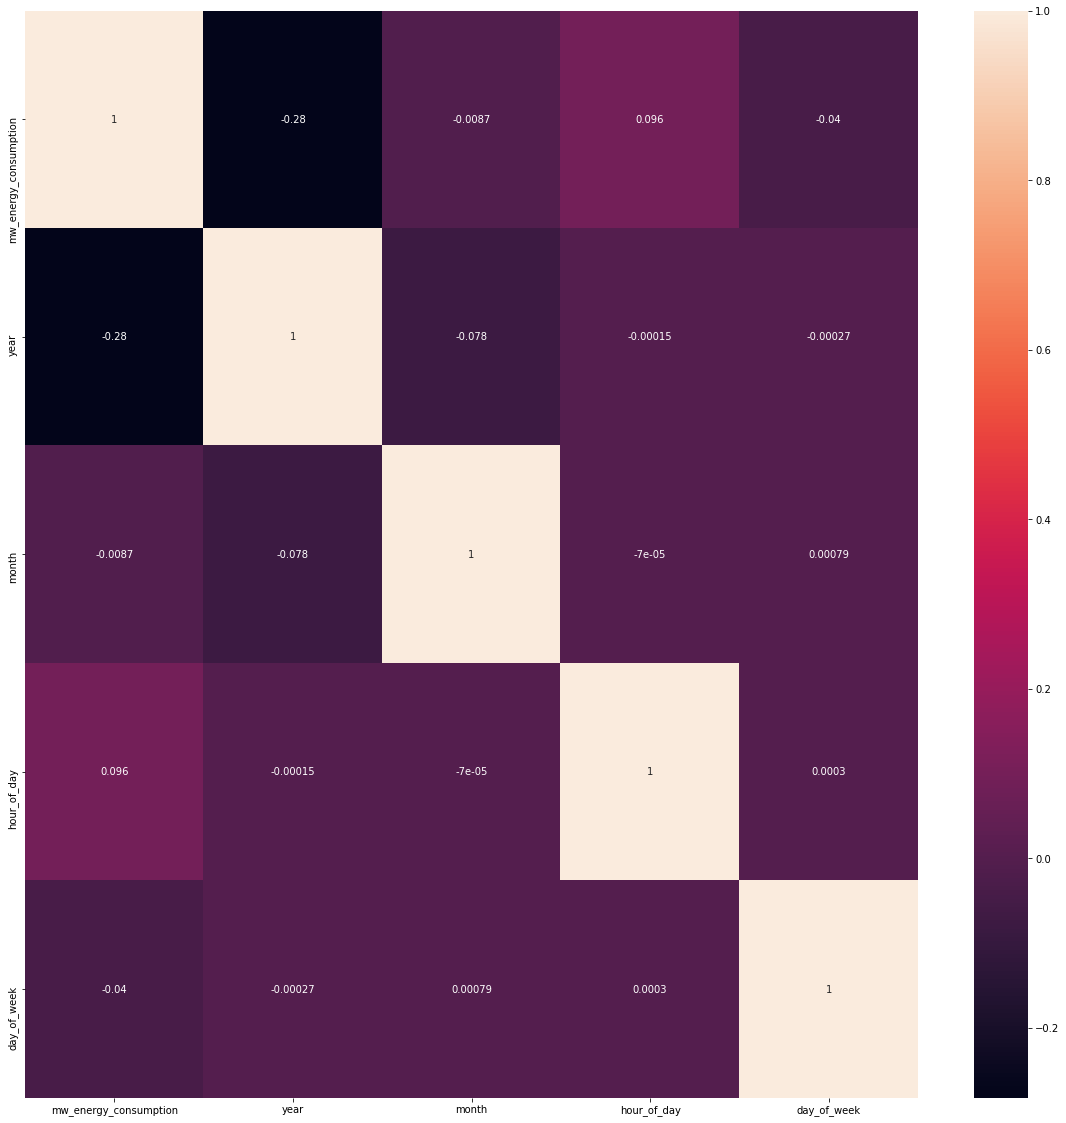

In [ ]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

# As we can see, the numerical variables (year and month) that we created just to help visualize the evolution of energy consumption, have very little relevance.

**FEATURE SELECTION**

In [ ]:
df2.head()

datetime  mw_energy_consumption  ... holidays day_of_week
0 2004-12-31 01:00:00                13478.0  ...  Holiday           4
1 2004-12-31 02:00:00                12865.0  ...  Holiday           4
2 2004-12-31 03:00:00                12577.0  ...  Holiday           4
3 2004-12-31 04:00:00                12517.0  ...  Holiday           4
4 2004-12-31 05:00:00                12670.0  ...  Holiday           4

[5 rows x 10 columns]

**Train-Test Split**

In [ ]:
df_train = df2.loc[df2.year < 2015]
df_test = df2.loc[df2.year >= 2015]

In [ ]:
df_train.head()

datetime  mw_energy_consumption  ... holidays day_of_week
0 2004-12-31 01:00:00                13478.0  ...  Holiday           4
1 2004-12-31 02:00:00                12865.0  ...  Holiday           4
2 2004-12-31 03:00:00                12577.0  ...  Holiday           4
3 2004-12-31 04:00:00                12517.0  ...  Holiday           4
4 2004-12-31 05:00:00                12670.0  ...  Holiday           4

[5 rows x 10 columns]

In [ ]:
df_test.head()

datetime  mw_energy_consumption  ... holidays day_of_week
81098 2015-01-01 00:00:00                16375.0  ...  Holiday           3
89834 2015-12-31 01:00:00                12415.0  ...  Holiday           3
89835 2015-12-31 02:00:00                12087.0  ...  Holiday           3
89836 2015-12-31 03:00:00                12010.0  ...  Holiday           3
89837 2015-12-31 04:00:00                11972.0  ...  Holiday           3

[5 rows x 10 columns]

**Working on PJME company**

In [ ]:
pjme = df2[df2.electric_company=='PJME']

In [ ]:
pjme.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                             object
year                              int64
month                             int64
hour_of_day                       int64
season                           object
holidays                         object
day_of_week                       int64
dtype: object

In [ ]:
pjme['datetime'] = pd.to_datetime(pjme['datetime'], errors='coerce')

pjme['date'] = pjme.index
pjme['hour'] = pjme['datetime'].dt.hour
pjme['dayofweek'] = pjme['datetime'].dt.dayofweek
pjme['quarter'] = pjme['datetime'].dt.quarter
pjme['month'] = pjme['datetime'].dt.month
pjme['year'] = pjme['datetime'].dt.year
pjme['dayofyear'] = pjme['datetime'].dt.dayofyear
pjme['dayofmonth'] = pjme['datetime'].dt.day
pjme['weekofyear'] = pjme['datetime'].dt.weekofyear

In [ ]:
pjme = pjme.set_index('datetime')

In [ ]:
pjme_power = pjme['mw_energy_consumption']

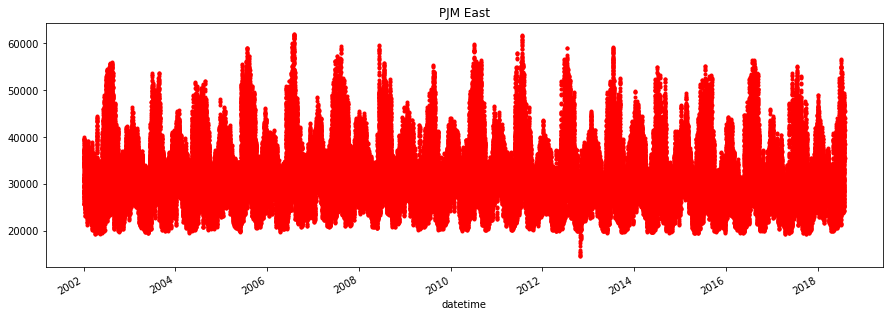

In [ ]:
pjme_power.plot(style = '.' , color = "red", figsize = (15,5), title = "PJM East");

In [ ]:
pjme.isna().sum(axis = 0)

mw_energy_consumption    0
electric_company         0
date                     0
year                     0
month                    0
hour_of_day              0
season                   0
holidays                 0
day_of_week              0
hour                     0
dayofweek                0
quarter                  0
dayofyear                0
dayofmonth               0
weekofyear               0
dtype: int64

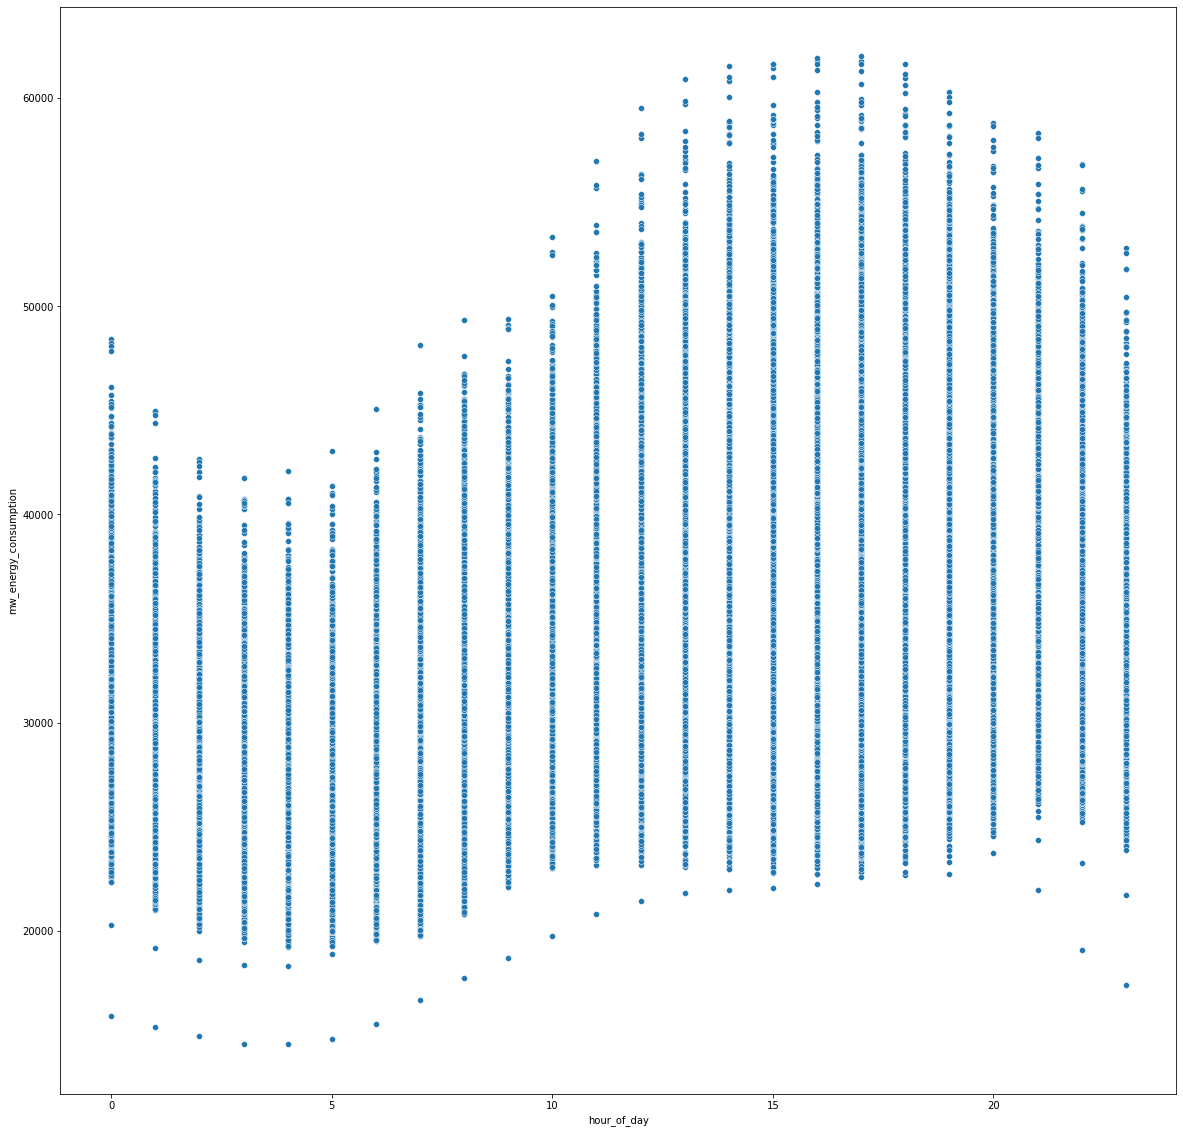

In [ ]:
sns.scatterplot('hour_of_day','mw_energy_consumption', data=pjme)

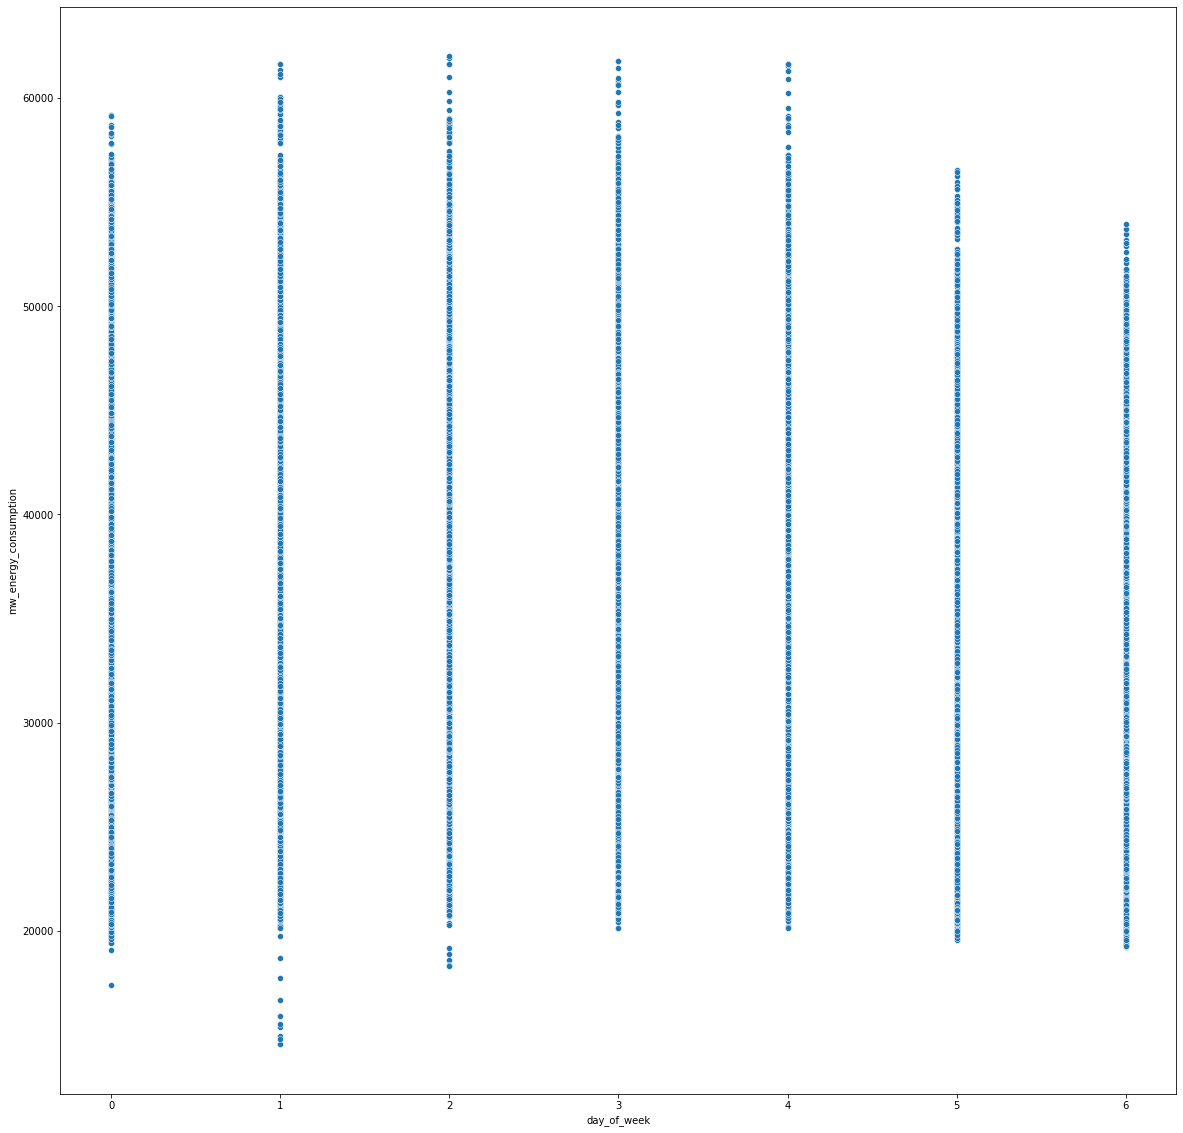

In [ ]:
sns.scatterplot('day_of_week','mw_energy_consumption', data=pjme)

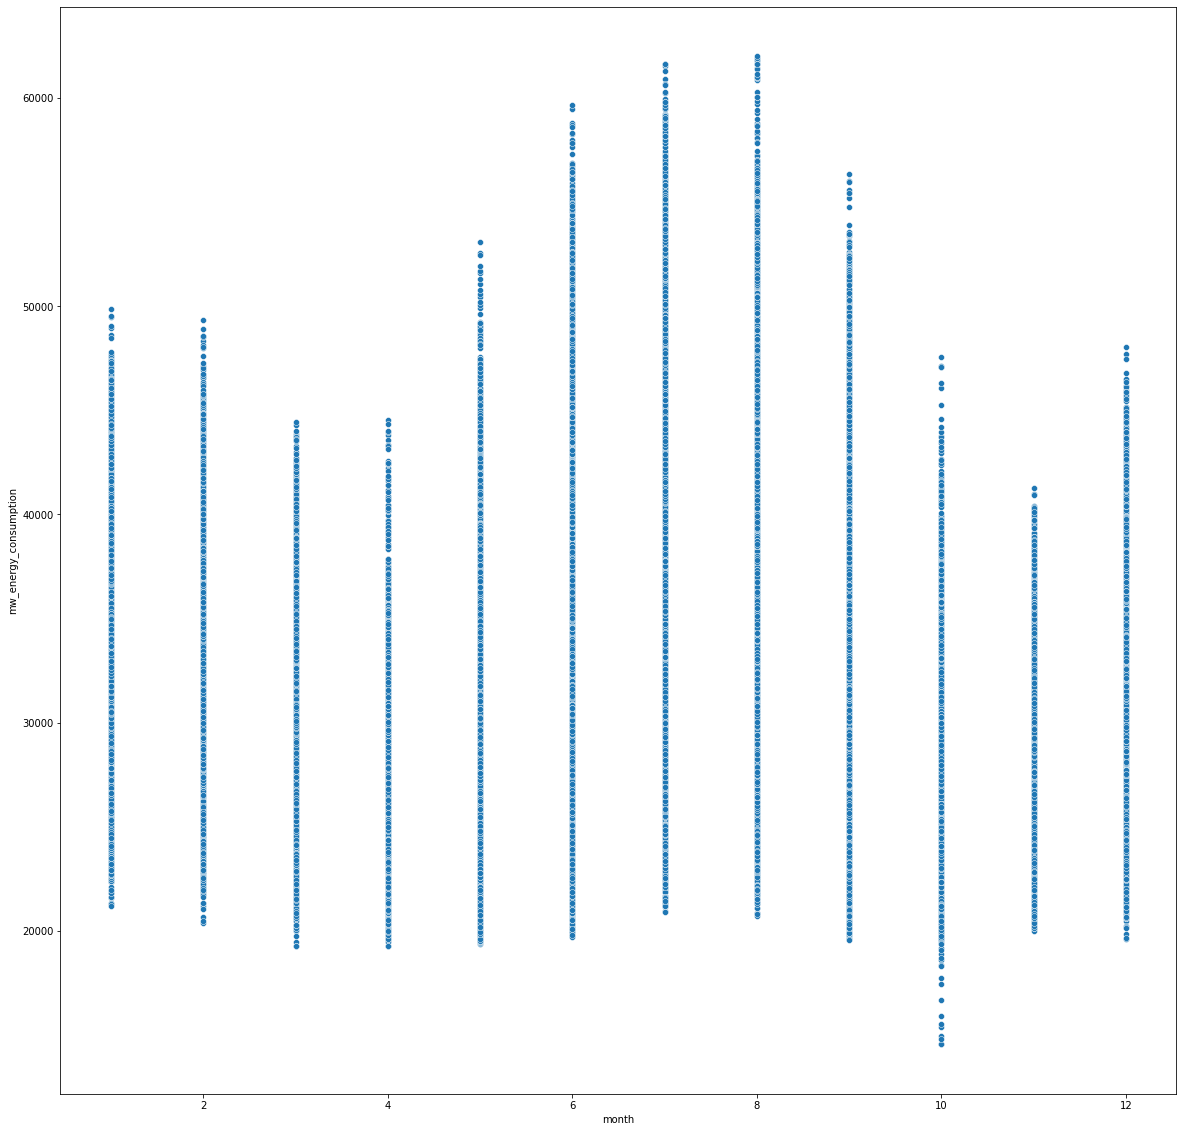

In [ ]:
sns.scatterplot('month','mw_energy_consumption', data=pjme)

(array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]), <a list of 11 Text major ticklabel objects>)

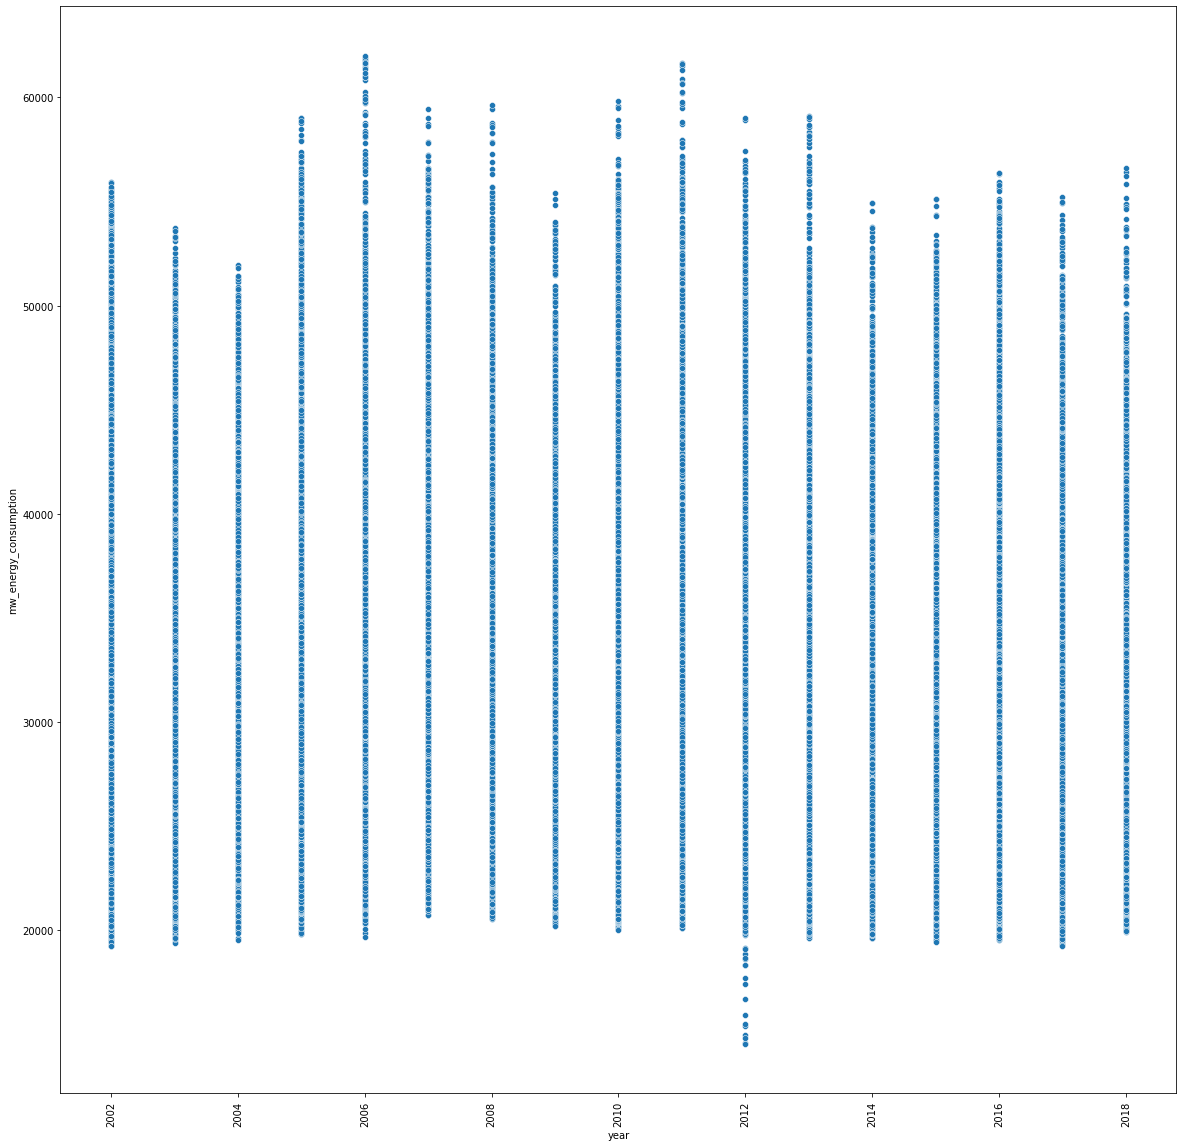

In [ ]:
sns.scatterplot('year','mw_energy_consumption', data=pjme)
plt.xticks(rotation = 'vertical')

**TRAIN-TEST SPLIT**

In [ ]:
pjme_train = pjme.loc[pjme.year < 2015]
pjme_test = pjme.loc[pjme.year >= 2015]

In [ ]:
pjme_train.tail()

mw_energy_consumption  ... weekofyear
datetime                                    ...           
2014-01-01 20:00:00                36193.0  ...          1
2014-01-01 21:00:00                35601.0  ...          1
2014-01-01 22:00:00                34242.0  ...          1
2014-01-01 23:00:00                32215.0  ...          1
2014-01-02 00:00:00                30159.0  ...          1

[5 rows x 15 columns]

In [ ]:
pjme_test.head()

mw_energy_consumption  ... weekofyear
datetime                                    ...           
2015-01-01 00:00:00                32802.0  ...          1
2015-12-31 01:00:00                24305.0  ...         53
2015-12-31 02:00:00                23156.0  ...         53
2015-12-31 03:00:00                22514.0  ...         53
2015-12-31 04:00:00                22330.0  ...         53

[5 rows x 15 columns]

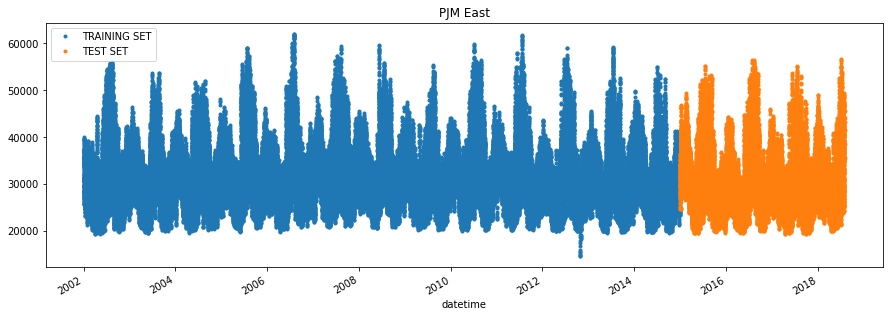

In [ ]:
(pjme_train.rename(columns={'mw_energy_consumption': 'TRAINING SET'})).append(pjme_test.rename(columns={'mw_energy_consumption': 'TEST SET'}), sort = False)[['TRAINING SET','TEST SET']].plot(style='.', figsize = (15,5), title = "PJM East");

In [ ]:
x_train = pjme_train[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
x_test = pjme_test[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]

y_train = pjme_train[['mw_energy_consumption']]
y_test = pjme_test[['mw_energy_consumption']]

**XG BOOST MODEL**

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(x_train, y_train,
       eval_set = [(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

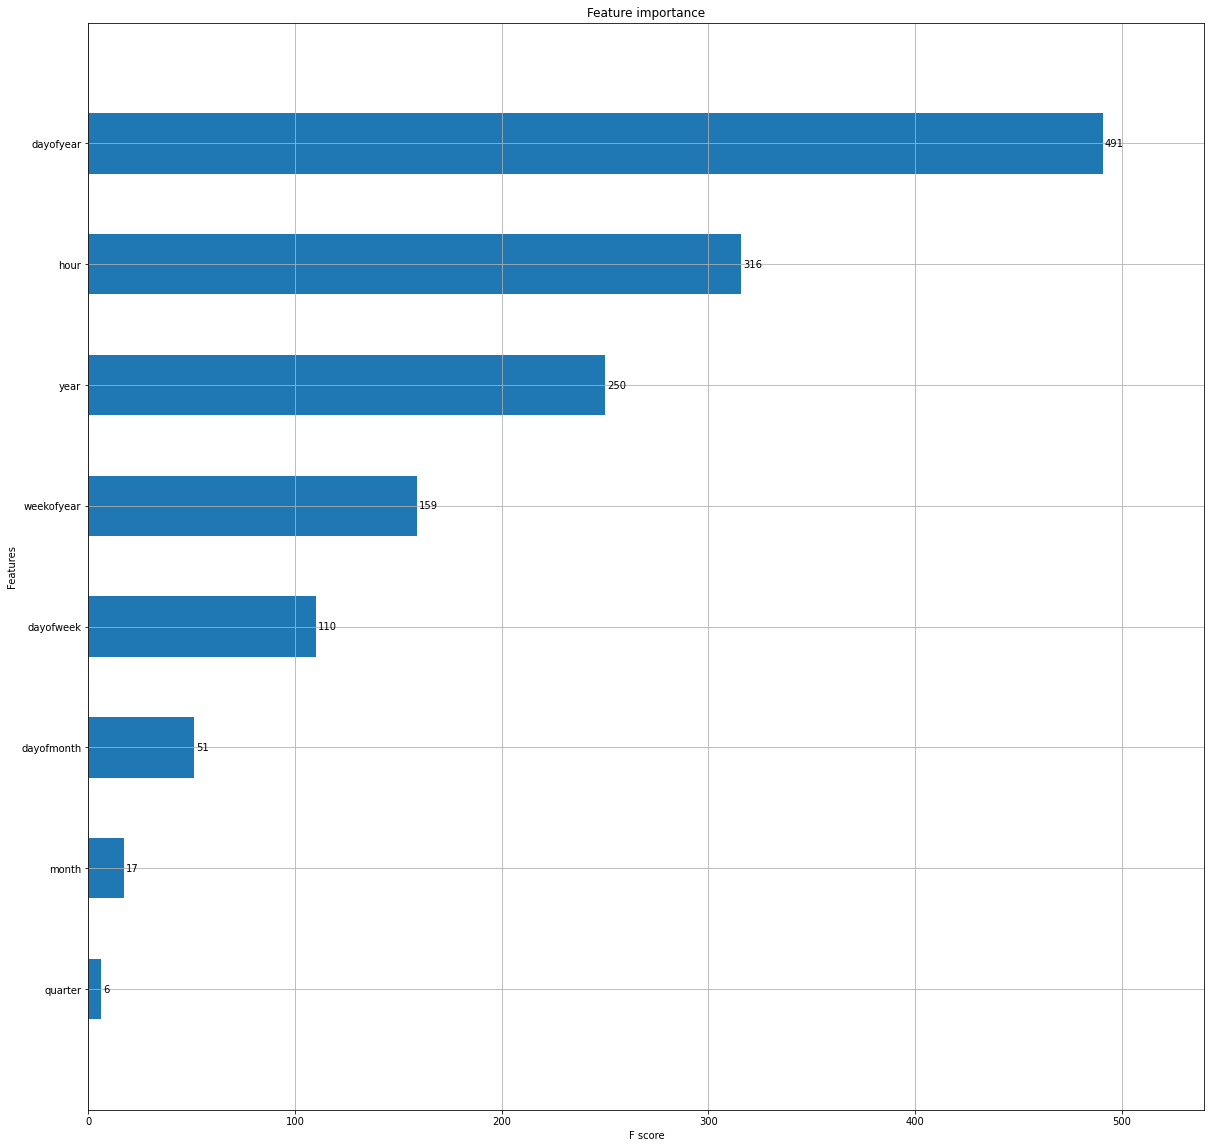

In [ ]:
plot_importance(reg, height = 0.5)

In [ ]:
pjme_test['MW_Prediction'] = reg.predict(x_test)
pjme_all = pd.concat([pjme_test, pjme_train], sort=False)

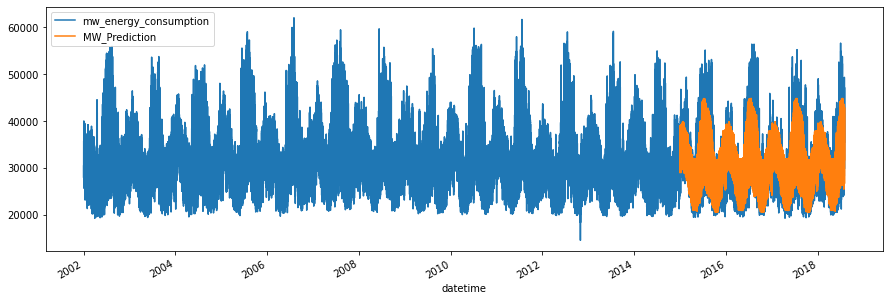

In [ ]:
pjme_all[['mw_energy_consumption','MW_Prediction']].plot(figsize=(15, 5))

**First Month Prediction**

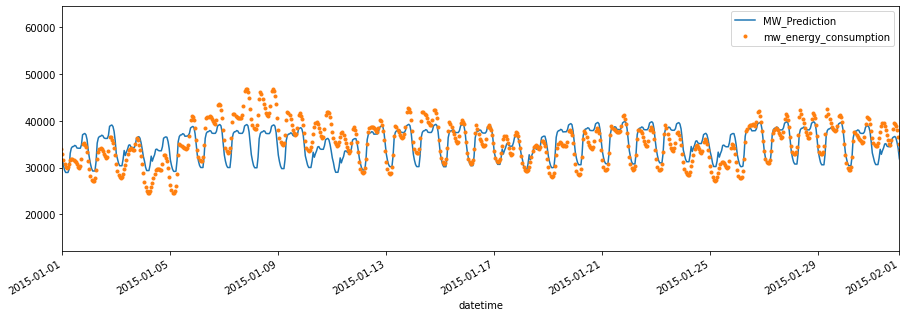

In [ ]:
_, ax = plt.subplots(1)
pjme_all[['MW_Prediction','mw_energy_consumption']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='01-01-2015', upper='02-01-2015')

**First week of January**

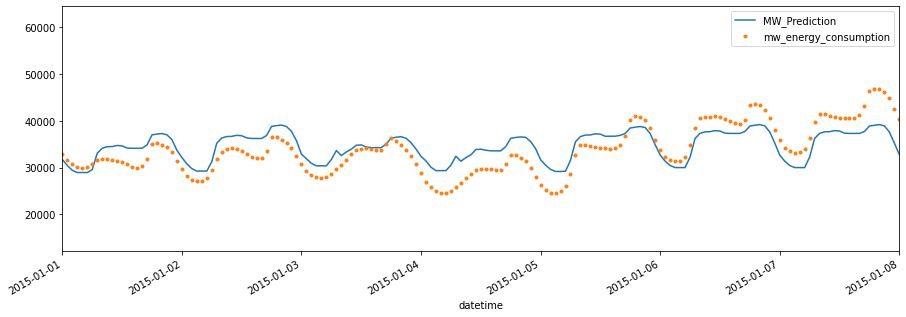

In [ ]:
_, ax = plt.subplots(1)
pjme_all[['MW_Prediction','mw_energy_consumption']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='01-01-2015', upper='01-08-2015')

**First week of July**

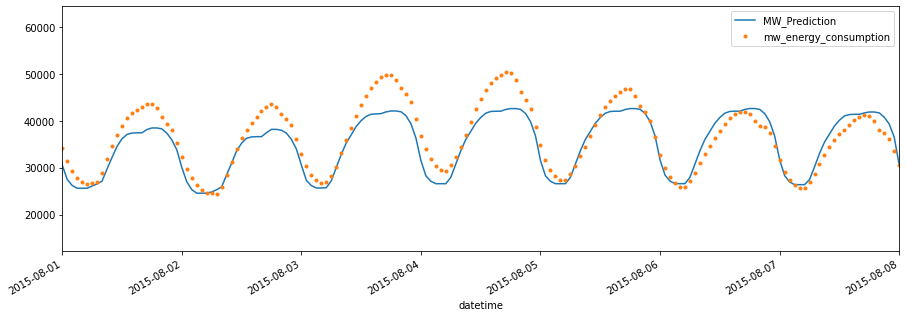

In [ ]:
_, ax = plt.subplots(1)
pjme_all[['MW_Prediction','mw_energy_consumption']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='08-01-2015', upper='08-08-2015')

In [ ]:
mean_squared_error(y_true=pjme_test['mw_energy_consumption'],
                   y_pred=pjme_test['MW_Prediction'])

13780047.921846451

In [ ]:
mean_absolute_error(y_true=pjme_test['mw_energy_consumption'],
                   y_pred=pjme_test['MW_Prediction'])

2848.8312333512245

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=pjme_test['mw_energy_consumption'],
                   y_pred=pjme_test['MW_Prediction'])

8.94924705409773

In [ ]:
pjme_test['error'] = pjme_test['mw_energy_consumption'] - pjme_test['MW_Prediction']
pjme_test['abs_error'] = pjme_test['error'].apply(np.abs)

In [ ]:
error_by_day = pjme_test.groupby(['year','month','dayofmonth']).mean()[['mw_energy_consumption','MW_Prediction','error','abs_error']]

In [ ]:
error_by_day.head(10)

mw_energy_consumption  ...    abs_error
year month dayofmonth                         ...             
2015 1     1                    31765.583333  ...  2361.785807
           2                    32141.166667  ...  2905.825928
           3                    32014.375000  ...  1677.712891
           4                    28542.291667  ...  4502.144694
           5                    33176.125000  ...  2742.250000
           6                    38358.833333  ...  2651.376709
           7                    40181.875000  ...  4474.418376
           8                    42445.375000  ...  6780.314209
           9                    38524.666667  ...  3254.512370
           10                   37703.583333  ...  4380.588704

[10 rows x 4 columns]

**Over forecasted days**

In [ ]:
error_by_day.sort_values('error', ascending=True).head(10)

mw_energy_consumption  ...    abs_error
year month dayofmonth                         ...             
2016 7     4                    28399.958333  ...  8587.002360
2017 2     24                   26445.083333  ...  7369.376953
2015 12    25                   24466.083333  ...  7118.839193
2017 2     20                   27070.583333  ...  7030.159342
2015 7     3                    30024.875000  ...  6996.149007
2017 6     28                   30531.208333  ...  6995.355794
     2     8                    28523.833333  ...  6987.835368
     9     2                    24201.458333  ...  6978.940430
     2     25                   24344.458333  ...  6939.806152
2018 2     21                   27572.500000  ...  6904.885091

[10 rows x 4 columns]

We can see, 1st worst day: 4th July,2016 - Holiday 3rd worst day: 25th December,2015 - Christmas 5th worst day: 4th July,2016 - Holiday

We should consider holidays in our analysis.

**Worst ABsolute Predicted Days**

In [ ]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

mw_energy_consumption  ...     abs_error
year month dayofmonth                         ...              
2016 8     13                   45185.833333  ...  13432.591227
           14                   44427.333333  ...  13368.495524
     9     10                   40996.166667  ...  11209.982829
           9                    43836.958333  ...  11005.922852
2015 2     20                   44694.041667  ...  10879.581380
2018 1     6                    43565.750000  ...  10130.490397
2016 8     12                   45724.708333  ...  10115.380452
2017 5     19                   38032.583333  ...   9923.640218
     12    31                   39016.000000  ...   9701.293945
2015 2     21                   40918.666667  ...   9634.402181

[10 rows x 4 columns]

**Best absolute predicted days**

In [ ]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

mw_energy_consumption  ...   abs_error
year month dayofmonth                         ...            
2016 10    3                    27705.583333  ...  229.586589
2015 10    28                   28500.958333  ...  388.022298
2016 10    8                    25183.333333  ...  401.022705
     5     1                    24503.625000  ...  428.287842
2017 10    29                   24605.666667  ...  474.636068
2016 9     16                   29258.500000  ...  491.074463
     3     20                   27989.416667  ...  499.709717
     10    2                    24659.083333  ...  516.198812
2017 10    14                   24949.583333  ...  520.862223
2015 5     6                    28948.666667  ...  546.657145

[10 rows x 4 columns]

**Plotting Worst predicted days**

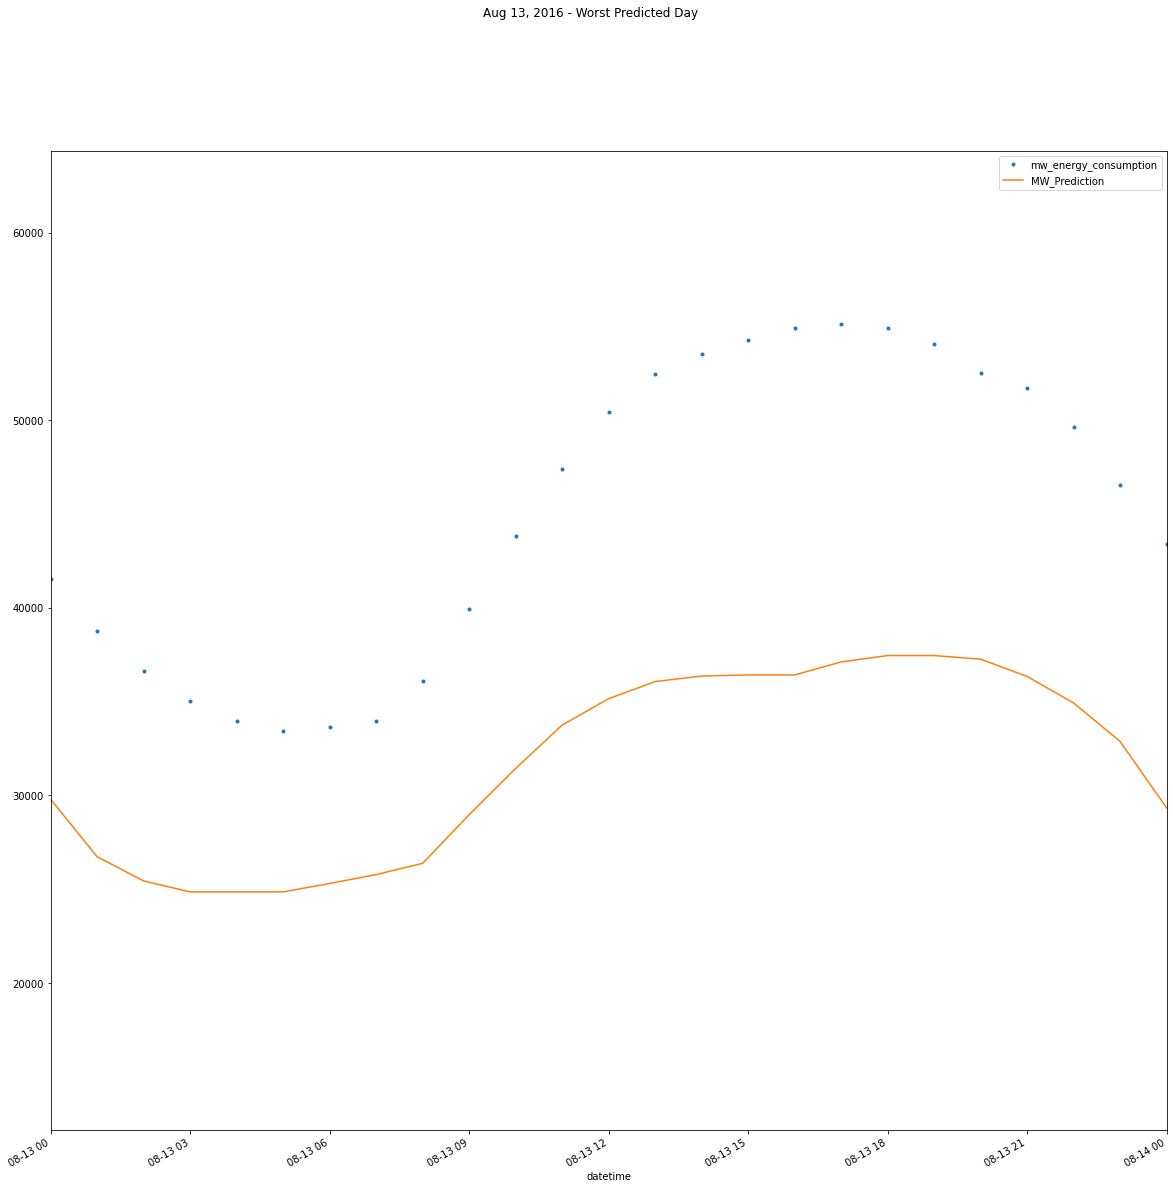

In [ ]:
_, ax = plt.subplots(1)
pjme_all[['mw_energy_consumption','MW_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='08-13-2016', upper='08-14-2016')
plot = plt.suptitle('Aug 13, 2016 - Worst Predicted Day')

**Plotting Best predicted days**

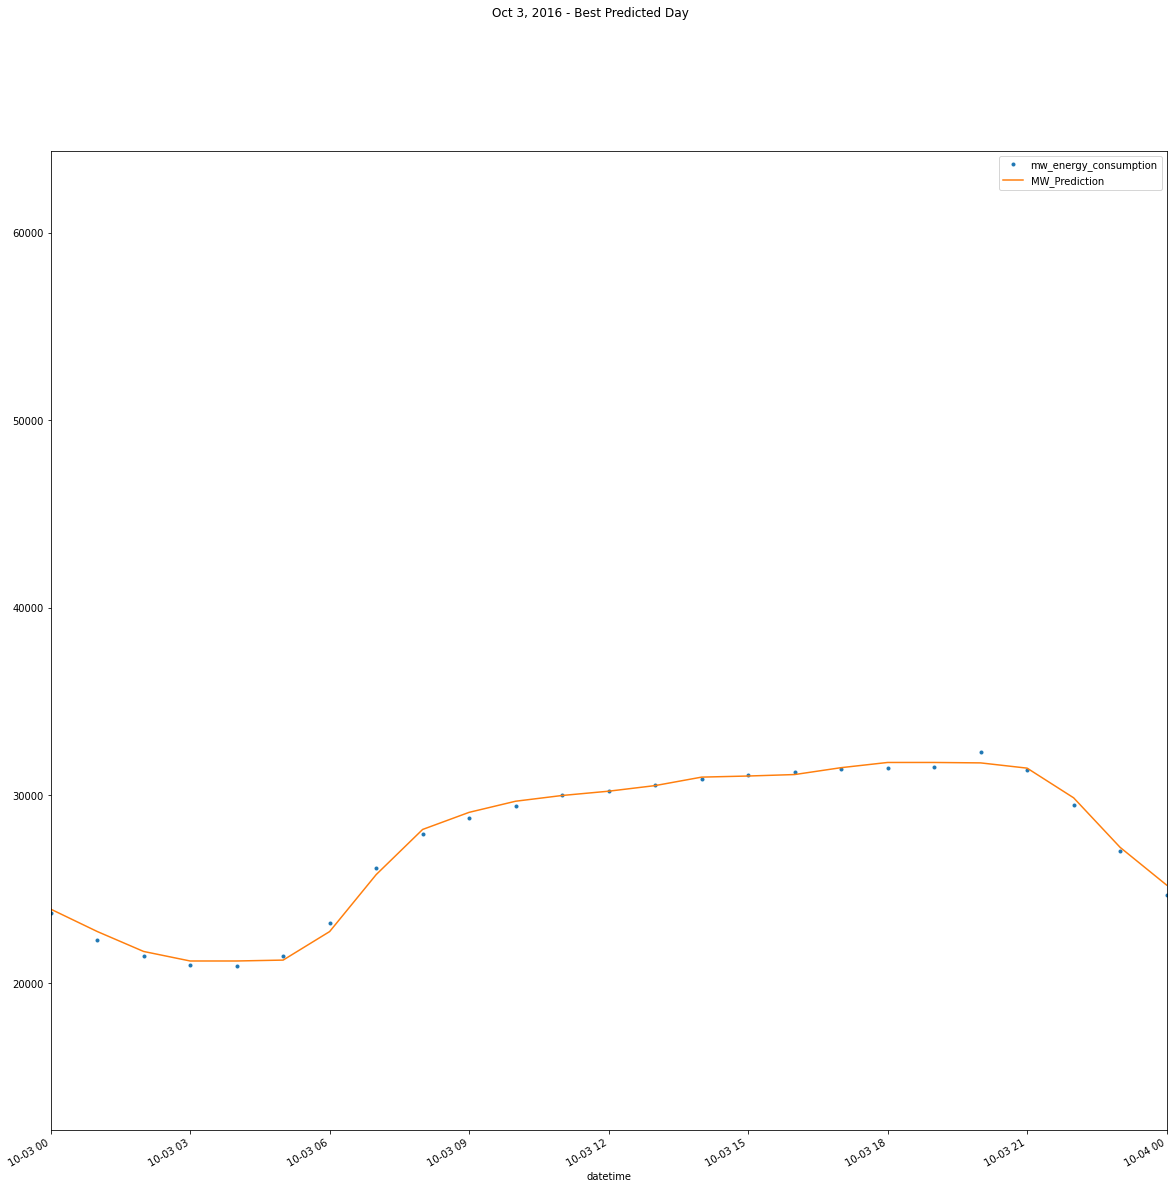

In [ ]:
_, ax = plt.subplots(1)
pjme_all[['mw_energy_consumption','MW_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='10-03-2016', upper='10-04-2016')
plot = plt.suptitle('Oct 3, 2016 - Best Predicted Day')

**Time series forecasting**

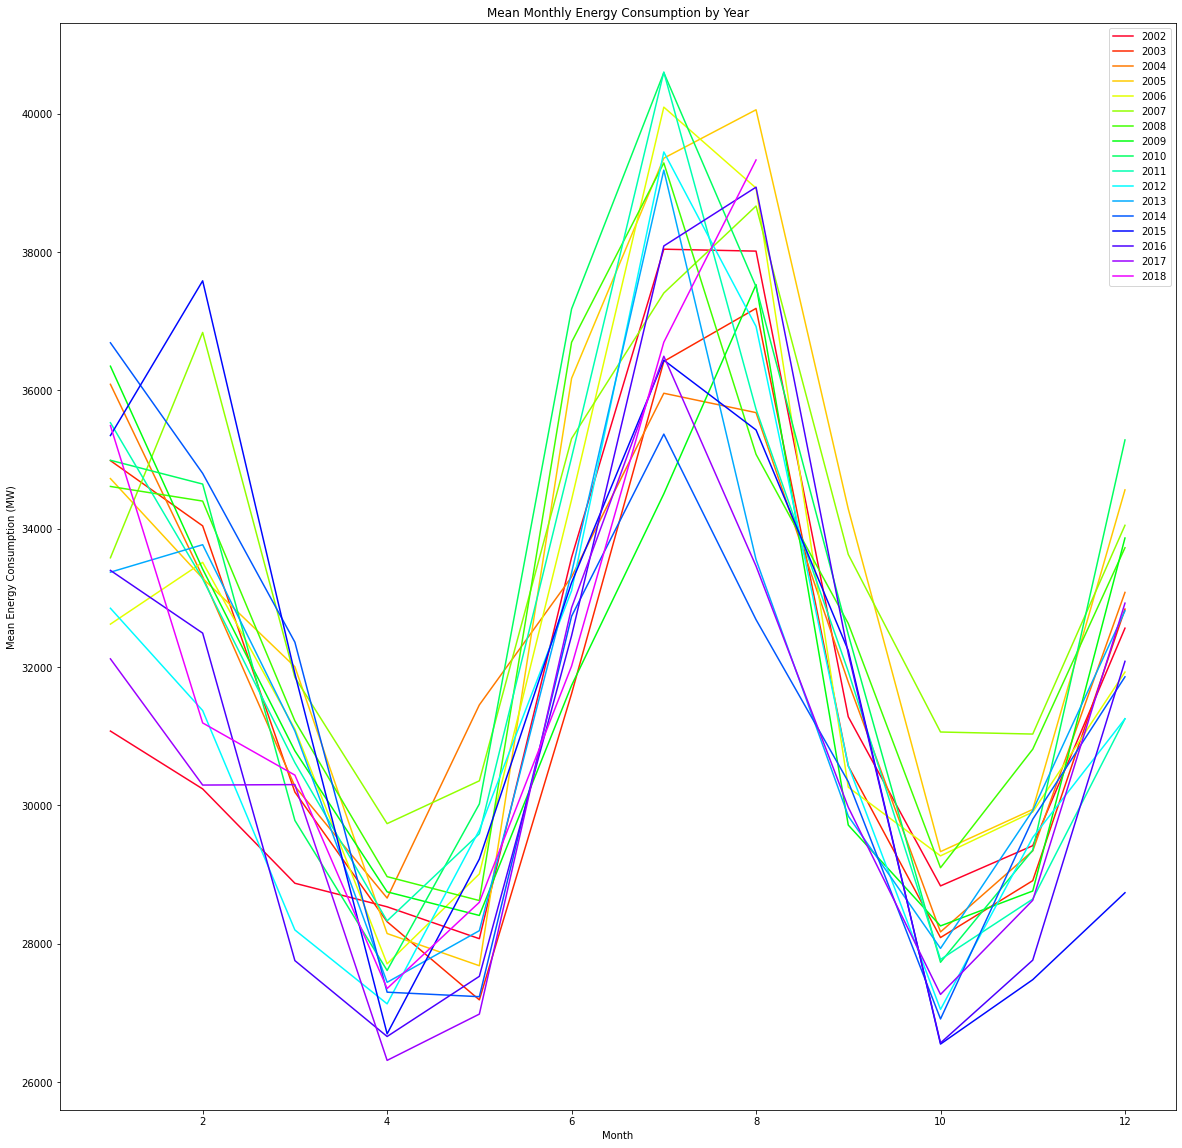

In [ ]:
year_group = pjme.groupby(['year', 'month']).mean().reset_index()
years = pjme['year'].unique()
NUM_COLORS = len(years)

cm = plt.get_cmap('gist_rainbow')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i, y in enumerate(years):
    df = year_group[year_group['year'] == y]
    plt.plot(df['month'], df['mw_energy_consumption'])
plt.title('Mean Monthly Energy Consumption by Year')
plt.xlabel('Month')
plt.ylabel('Mean Energy Consumption (MW)')
plt.legend(pjme.year.unique())
plt.savefig('/content/seasonal_plot.png')
plt.show()

**MOVING AVERAGE (MA)**

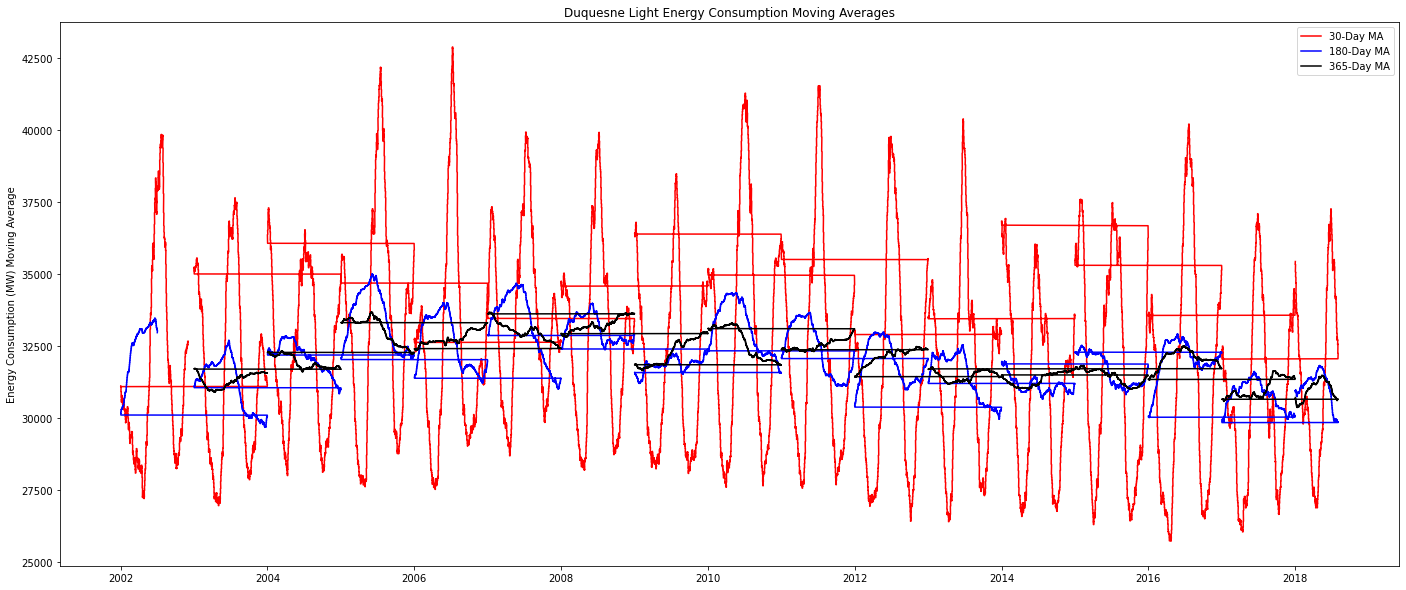

In [ ]:
MONTH_PERIOD = 24*30
MIDYEAR_PERIOD = 24*182
YEAR_PERIOD = 24*365

month_roll = pjme.rolling(MONTH_PERIOD).mean()
midyear_roll = pjme.rolling(MIDYEAR_PERIOD).mean()
year_roll = pjme.rolling(YEAR_PERIOD).mean()

fig, ax = plt.subplots(figsize=(24, 10))
plt.plot(month_roll.index, month_roll['mw_energy_consumption'], color='red', label='30-Day MA')
plt.plot(midyear_roll.index, midyear_roll['mw_energy_consumption'], color='blue', label='180-Day MA')
plt.plot(year_roll.index, year_roll['mw_energy_consumption'], color='black', label='365-Day MA')
plt.title('Duquesne Light Energy Consumption Moving Averages')
plt.ylabel('Energy Consumption (MW) Moving Average')
plt.legend()
plt.savefig('/content/moving_average_smoothing.png')
plt.show()

**Estimated daily amplitude**

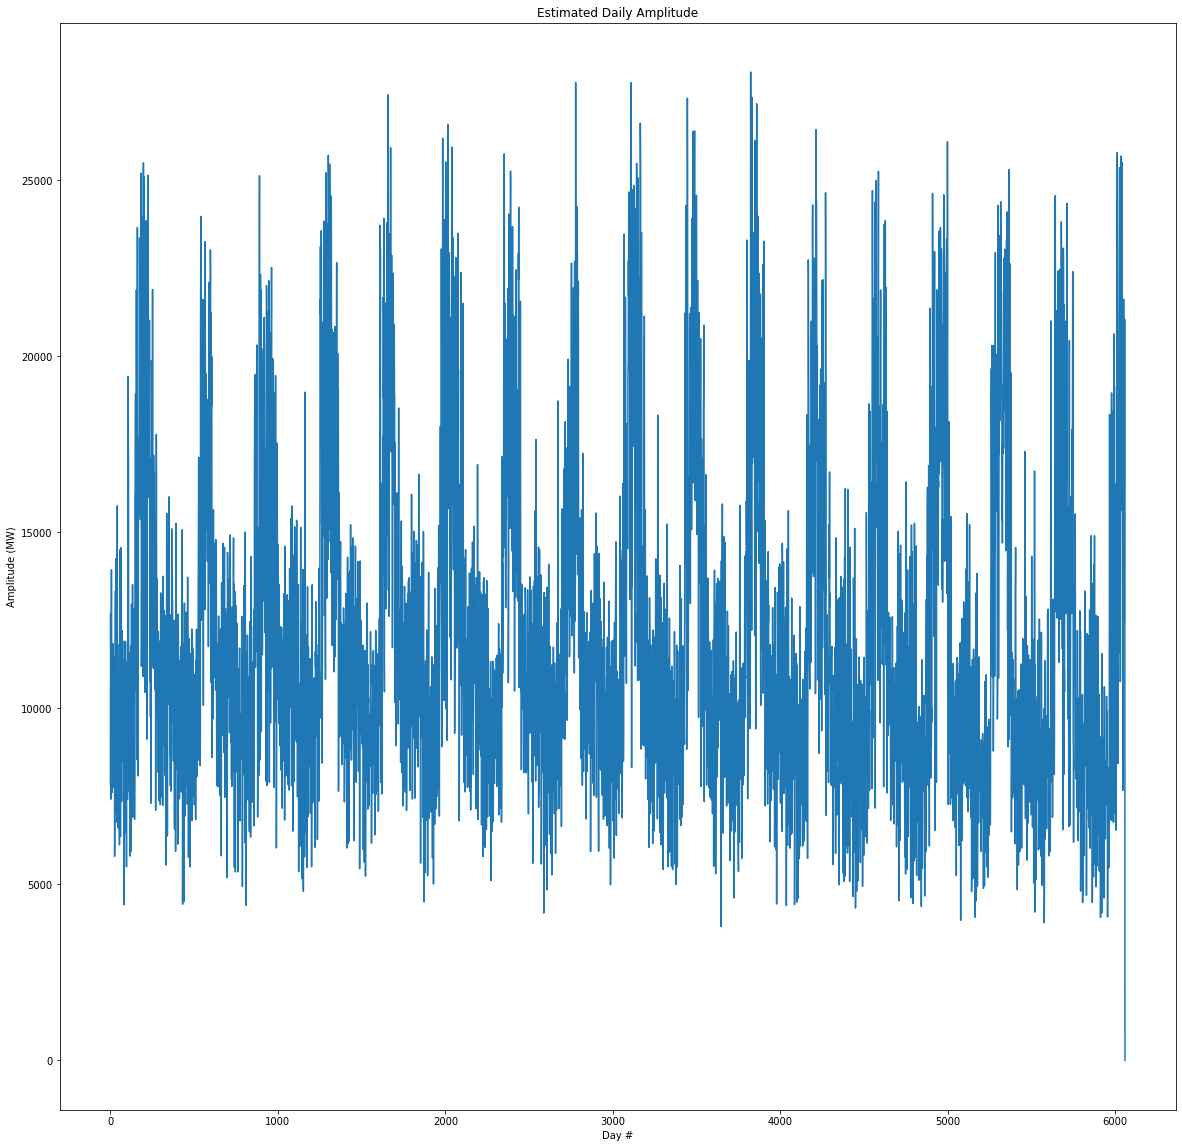

In [ ]:
max_daily_vals = pjme.groupby(['year', 'dayofyear']).max()['mw_energy_consumption'].values
min_daily_vals = pjme.groupby(['year', 'dayofyear']).min()['mw_energy_consumption'].values
daily_amp = max_daily_vals - min_daily_vals
plt.plot(daily_amp)
plt.xlabel('Day #')
plt.ylabel('Amplitude (MW)')
plt.title('Estimated Daily Amplitude')
plt.savefig('/content/daily_amplitude.png')
plt.show()

**Multiplicative Decomposition**

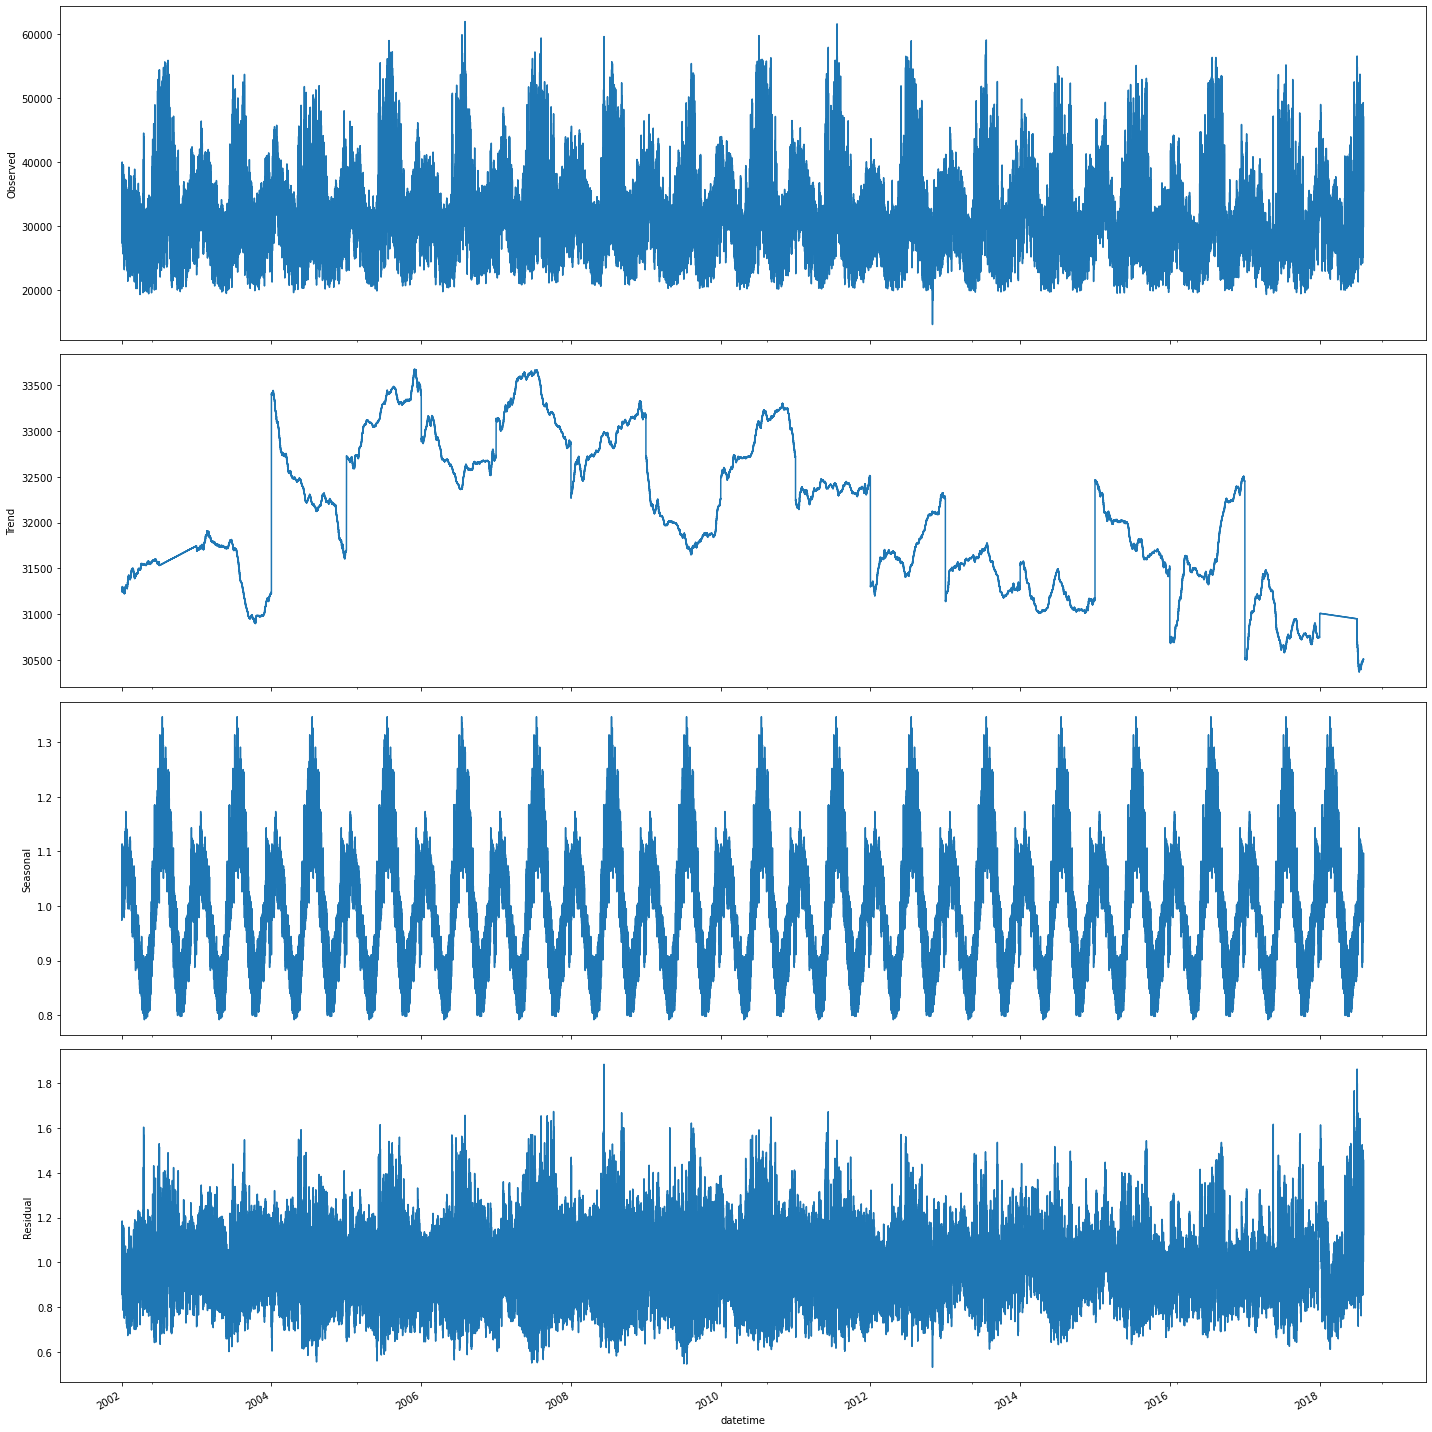

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ANNUAL_PERIOD = 365*24
mult_decomp = seasonal_decompose(pjme['mw_energy_consumption'], model='multiplicative', extrapolate_trend='freq',freq=ANNUAL_PERIOD)
mult_decomp.plot()
plt.savefig('/content/multiplicative_decomp.png')
plt.show()

**Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    from statsmodels.tsa.stattools import adfuller
    
    #Determing rolling statistics
    roll_mean=timeseries.rolling(2, min_periods=1).sum()
    roll_std =timeseries.rolling(2, min_periods=1).std().fillna(method='bfill')

    #Perform Dickey-Fuller test:

    from statsmodels.tsa.stattools import adfuller

    print ('Results of Dickey-Fuller Test:')
    adf_test = adfuller(timeseries['mw_energy_consumption'],autolag='AIC')
    dfoutput = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

   # print ("ADF = " + str(adf_test[0]))
    #print ("p-value = " +str(adf_test[1]))


test_stationarity(pjme)

Results of Dickey-Fuller Test:
Test Statistic                -1.882891e+01
p-value                        2.022125e-30
#Lags Used                     7.400000e+01
Number of Observations Used    1.452910e+05
Critical Value (1%)           -3.430395e+00
Critical Value (5%)           -2.861560e+00
Critical Value (10%)          -2.566781e+00
dtype: float64


**Differencing**

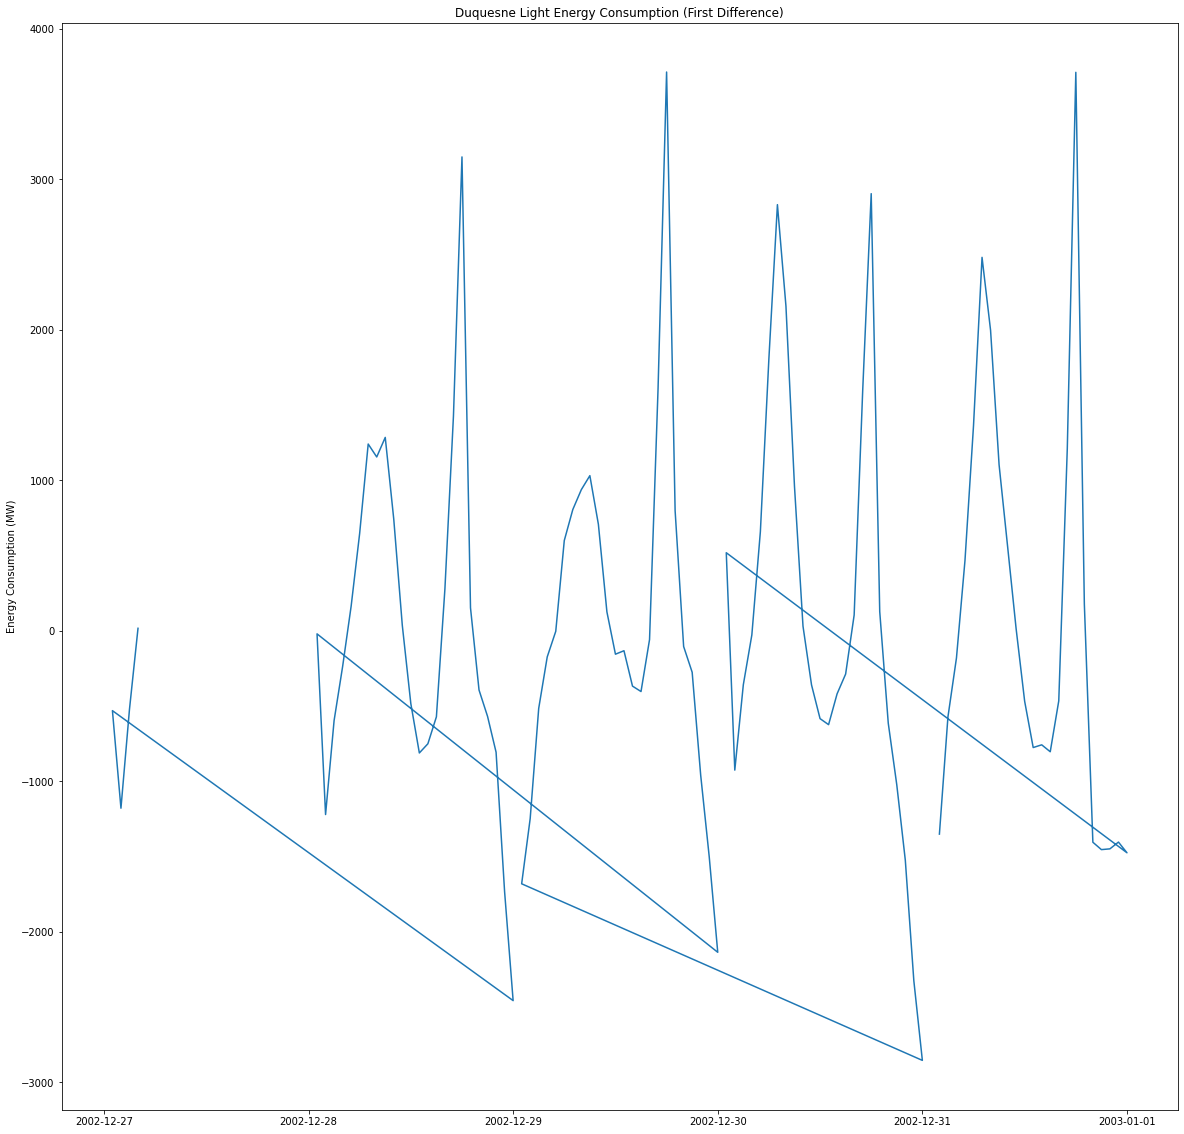

In [ ]:
# First Difference (First 100 Values)
pjme['first_difference'] = pjme['mw_energy_consumption'] - pjme['mw_energy_consumption'].shift(1)
plt.plot(pjme.index[:100], pjme['first_difference'][:100])
plt.title('Duquesne Light Energy Consumption (First Difference)')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('/content/first_difference.png')
plt.show()

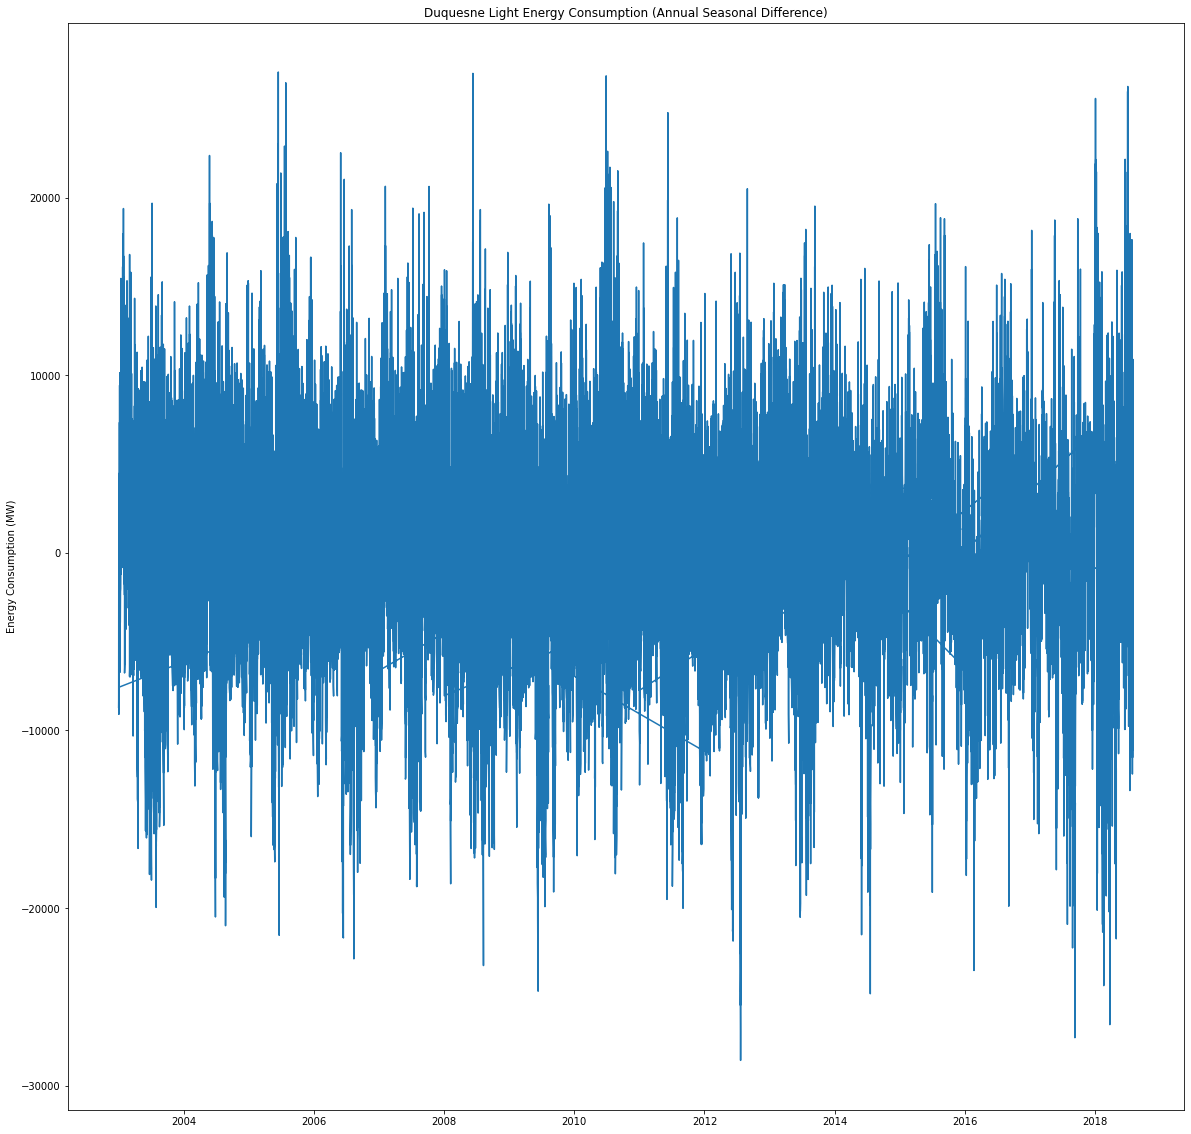

In [ ]:
# Annual Seasonal Difference (First 1000 Values)
ANNUAL_SHIFT = 24*365

pjme['seasonal_difference'] = pjme['mw_energy_consumption'] - pjme['mw_energy_consumption'].shift(ANNUAL_SHIFT)
plt.plot(pjme.index, pjme['seasonal_difference'])
plt.title('Duquesne Light Energy Consumption (Annual Seasonal Difference)')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('/content/annual_seasonal_difference.png')
plt.show()

In [ ]:
adf_result = adfuller(pjme['seasonal_difference'][ANNUAL_SHIFT:])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -29.4523314602051
p-value: 0.0


In [ ]:
pjme['seasonal_first_difference'] = pjme['first_difference'] - pjme['first_difference'].shift(ANNUAL_SHIFT)
plt.plot(pjme.index, pjme['seasonal_first_difference'])
plt.title('Duquesne Light Energy Consumption (Annual Seasonal Difference)')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('/content/annual_seasonal_difference.png')
plt.show()

In [ ]:
adf_result = adfuller(pjme['seasonal_first_difference'][ANNUAL_SHIFT+1:])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -58.205147825795834
p-value: 0.0


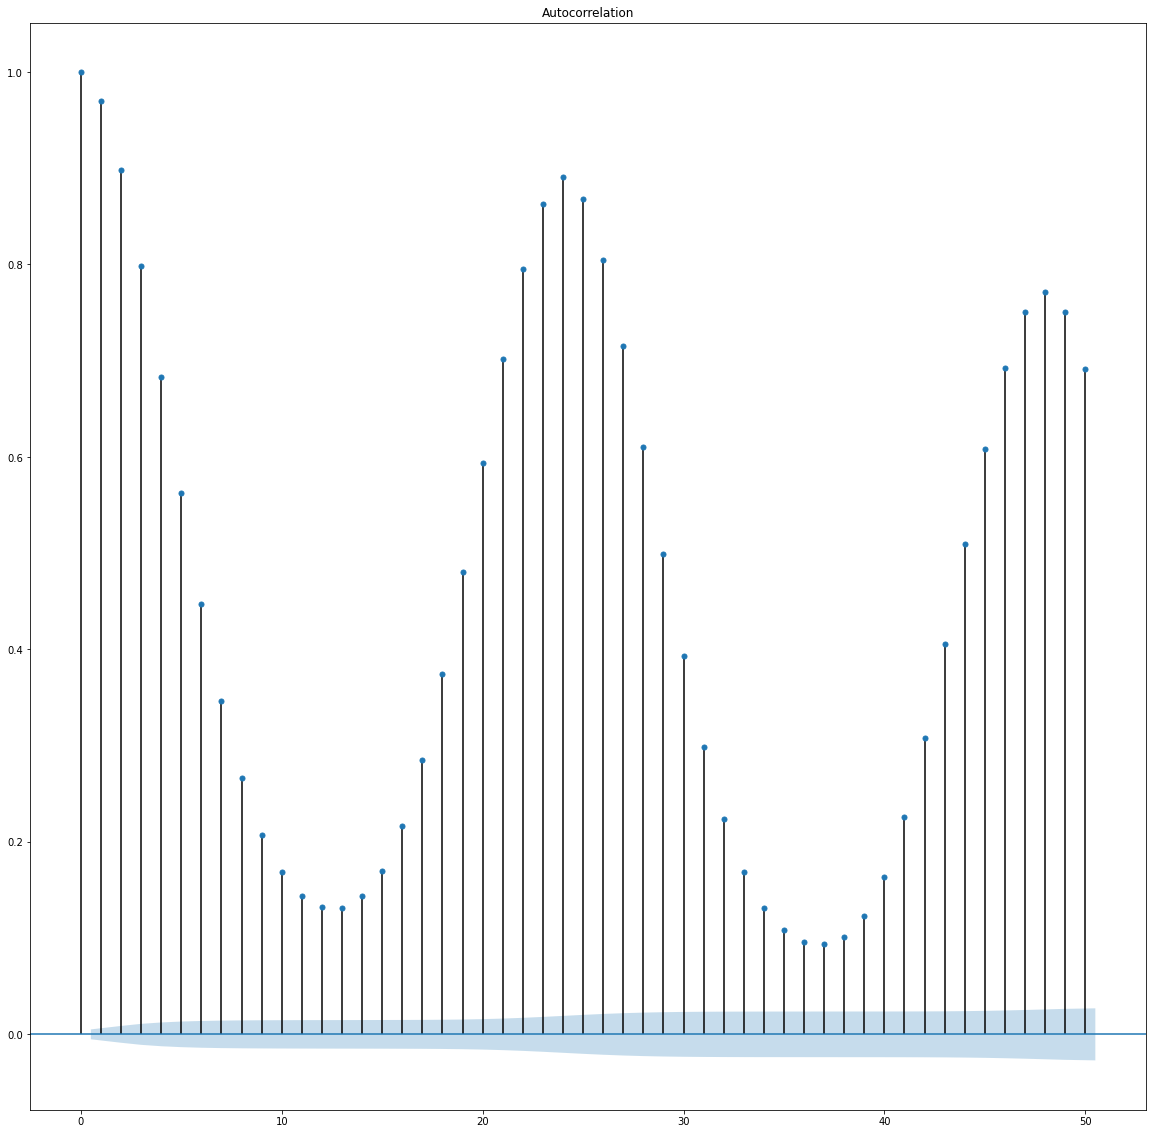

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(pjme['mw_energy_consumption'], lags=50)
plt.savefig('/content/acf.png')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pjme['mw_energy_consumption'], lags=100)
plt.savefig('/content/pacf.png')
plt.show()

**Baseline ARIMA Models**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime

train_series = pjme.loc[(pjme.index >= datetime(2014, 1, 1)) & (pjme.index < datetime(2018, 8, 1)), 'mw_energy_consumption']
test_series = pjme.loc[(pjme.index >= datetime(2018, 8, 1)), 'mw_energy_consumption']

In [ ]:
ar_preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    ar_preds.append(output[0][0])
    history.append(test_series[t])

ar_pred_series = pd.Series(ar_preds, index=test_series.index)

error = mean_squared_error(test_series, ar_pred_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(ar_pred_series, color='blue', label='Forecasted Values')
plt.legend()
plt.title('AR(1) Model Forecasts')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('/content/ar-1.png')
plt.show()

MSE: 3929329.656


MSE: 30577317.480


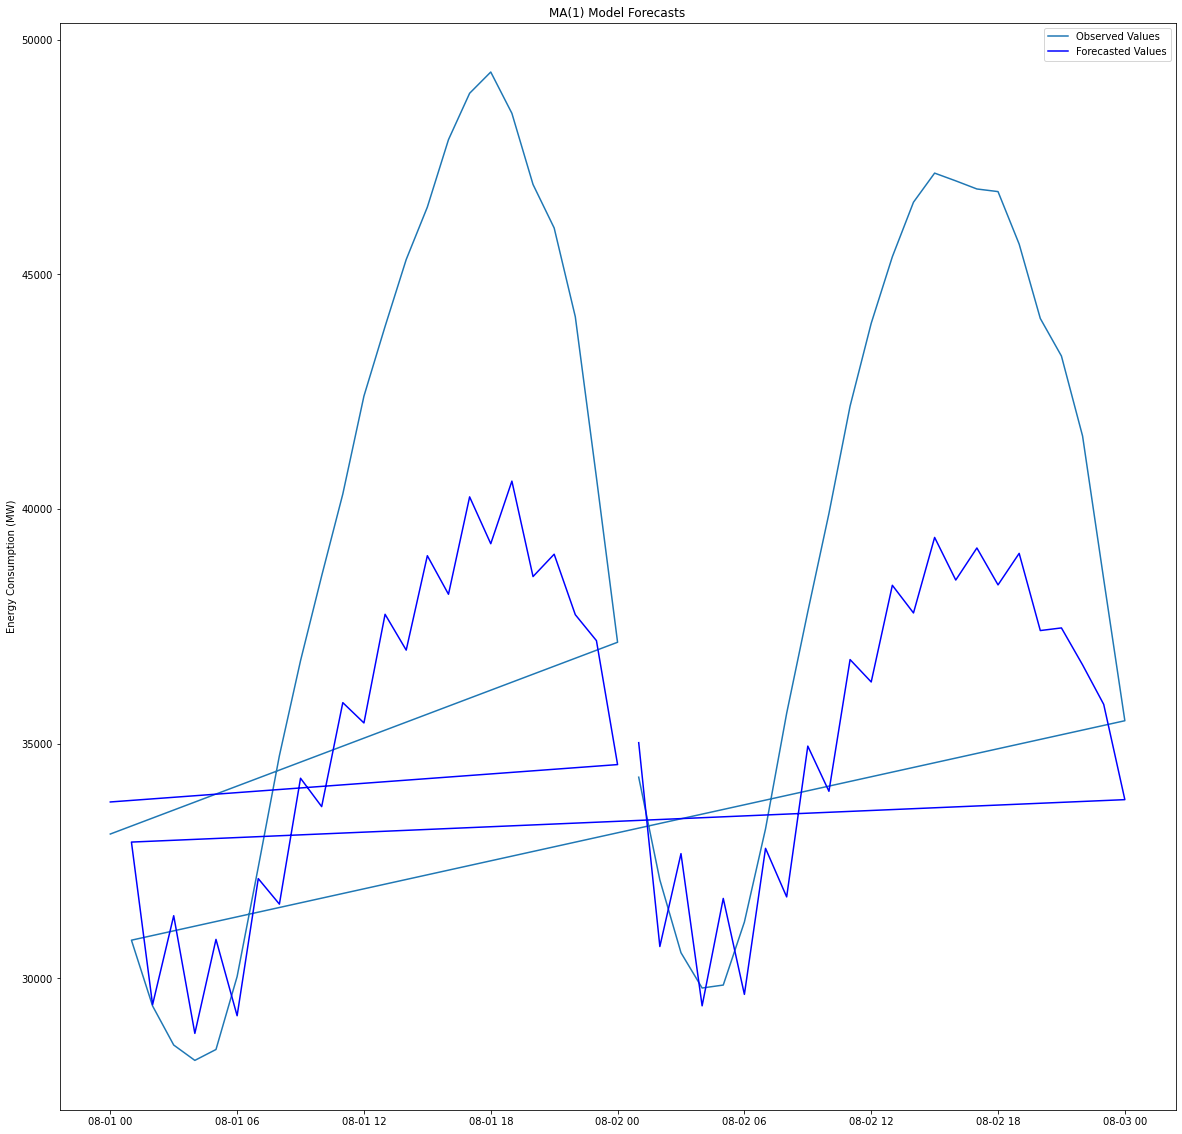

In [ ]:
ma_preds = []
history = [x for x in train_series]

for t in range(len(test_series)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    ma_preds.append(output[0][0])
    history.append(test_series[t])

ma_pred_series = pd.Series(ma_preds, index=test_series.index)

error = mean_squared_error(test_series, ma_pred_series)
print('MSE: %.3f' % error)

plt.plot(test_series, label='Observed Values')
plt.plot(ma_pred_series, color='blue', label='Forecasted Values')
plt.legend()
plt.title('MA(1) Model Forecasts')
plt.ylabel('Energy Consumption (MW)')
plt.savefig('/content/ma-1.png')
plt.show()

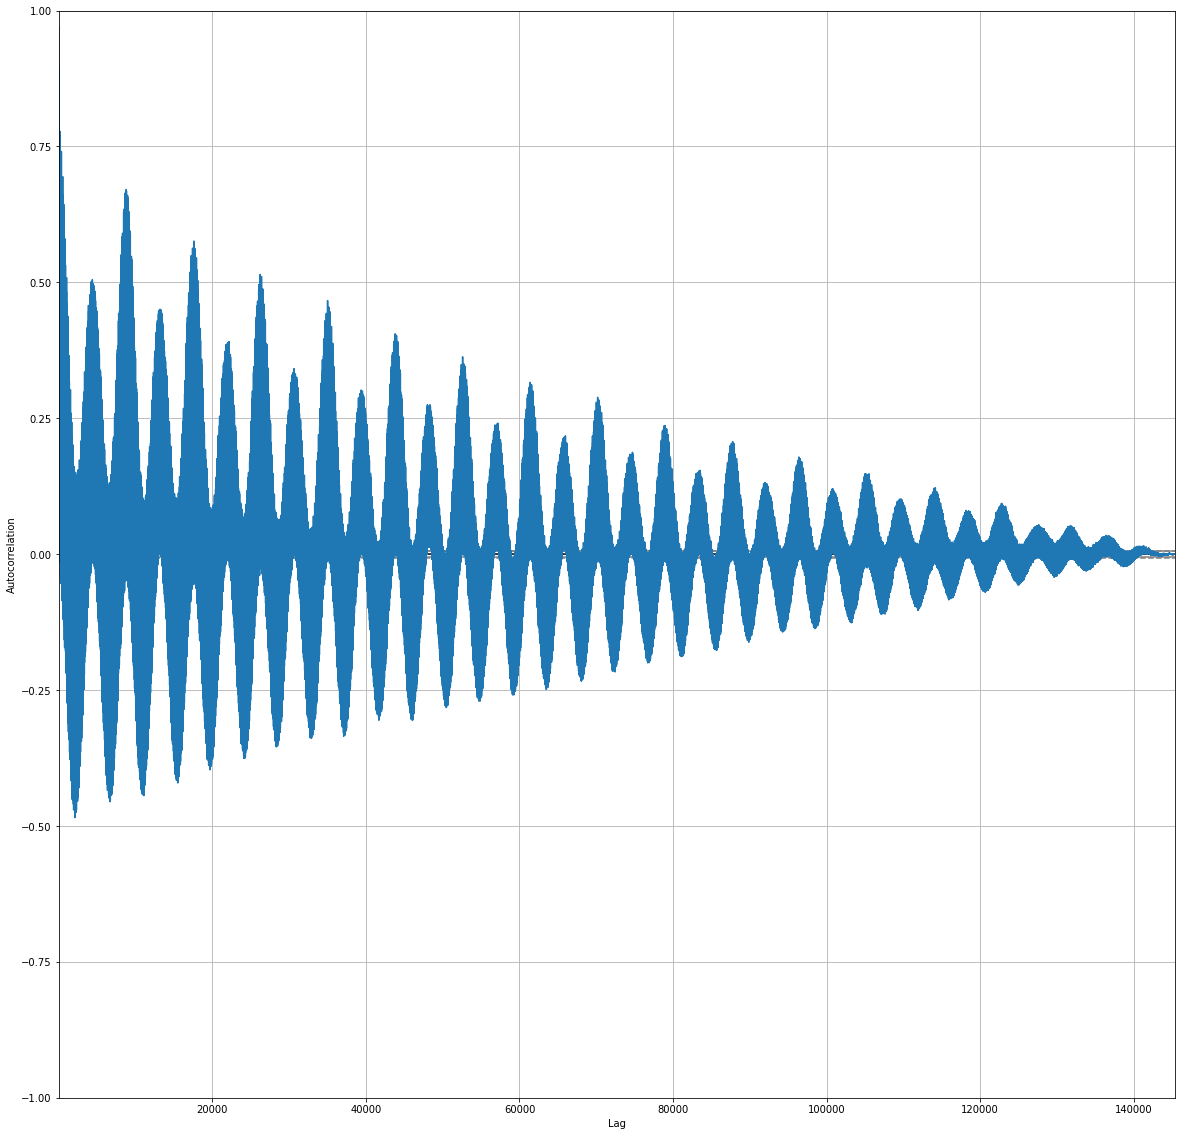

In [ ]:
# AUTOCORRELATION PLOT
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pjme['mw_energy_consumption'])
plt.show()

In [ ]:
pjme = pd.read_csv( '/content/PJME_hourly.csv', low_memory=False )

In [ ]:
pjme.head()

Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0

In [ ]:
# Convert object date to datetime format
pjme['Datetime'] = pd.to_datetime(pjme['Datetime'])

In [ ]:
# resample minute data to total for each day
from pandas import read_csv
# load the new file
# resample data to daily
pjme = read_csv('/content/PJME_hourly.csv', header=0, infer_datetime_format=True, parse_dates=['Datetime'], index_col=['Datetime'])

daily_groups = pjme.resample('W')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(866, 1)
              PJME_MW
Datetime             
2002-01-06  4632079.0
2002-01-13  5289881.0
2002-01-20  5284084.0
2002-01-27  5063777.0
2002-02-03  4905010.0


In [ ]:
# split into standard weeks
PJME = daily_data.values

train_pct_index = int(0.75 * len(PJME))

train = PJME[0:train_pct_index]
test =  PJME[train_pct_index:]

print(train.shape)
print(test.shape)

(649, 1)
(217, 1)


**Create model**

In [ ]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler

ss= MinMaxScaler(feature_range=(0,1))
train= ss.fit_transform(train)
test= ss.fit_transform(test)

In [ ]:
def create_dataset(sequence, n_steps=2):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
		# gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

n_steps=8
trainX, trainY = create_dataset(train,n_steps)
testX, testY = create_dataset(test,n_steps)
  
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

**LSTM (Long Short Term Memory)**

**Vanilla LSTM**

In [ ]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
import math
from math import sqrt
from pandas import concat

# design network
model_van = Sequential()
model_van.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model_van.add(Dense(1))
model_van.compile(loss='mae', optimizer='adam')
# fit network
history_van = model_van.fit(trainX, trainY, epochs=80, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=False)

# plot history
plt.plot(history_van.history['loss'], label='train') 
plt.plot(history_van.history['val_loss'], label='test')
plt.legend()
plt.show()
 
# prediction on test data
y_pred = model_van.predict(testX) 
# invert the test to original values
y_test_inverse = DataFrame(ss.inverse_transform(testY)) 
# assigning datetime
y_test_inverse.index = pjme.index[-len(testY):] 
  
print(f'MAE {mean_absolute_error(testY, y_pred)}')
print(f'MSE {mean_squared_error(testY, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(testY, y_pred))}')
print(f'R2 {r2_score(testY, y_pred)}')

Epoch 1/80
7/7 - 3s - loss: 0.3237 - val_loss: 0.3663
Epoch 2/80
7/7 - 0s - loss: 0.2328 - val_loss: 0.2506
Epoch 3/80
7/7 - 0s - loss: 0.1585 - val_loss: 0.1722
Epoch 4/80
7/7 - 0s - loss: 0.1303 - val_loss: 0.1463
Epoch 5/80
7/7 - 0s - loss: 0.1290 - val_loss: 0.1432
Epoch 6/80
7/7 - 0s - loss: 0.1277 - val_loss: 0.1391
Epoch 7/80
7/7 - 0s - loss: 0.1212 - val_loss: 0.1398
Epoch 8/80
7/7 - 0s - loss: 0.1166 - val_loss: 0.1414
Epoch 9/80
7/7 - 0s - loss: 0.1134 - val_loss: 0.1384
Epoch 10/80
7/7 - 0s - loss: 0.1093 - val_loss: 0.1311
Epoch 11/80
7/7 - 0s - loss: 0.1050 - val_loss: 0.1248
Epoch 12/80
7/7 - 0s - loss: 0.1010 - val_loss: 0.1205
Epoch 13/80
7/7 - 0s - loss: 0.0970 - val_loss: 0.1173
Epoch 14/80
7/7 - 0s - loss: 0.0933 - val_loss: 0.1141
Epoch 15/80
7/7 - 0s - loss: 0.0898 - val_loss: 0.1109
Epoch 16/80
7/7 - 0s - loss: 0.0866 - val_loss: 0.1082
Epoch 17/80
7/7 - 0s - loss: 0.0838 - val_loss: 0.1062
Epoch 18/80
7/7 - 0s - loss: 0.0815 - val_loss: 0.1044
Epoch 19/80
7/7 - 0

MAE 0.09831463802587824
MSE 0.01745962216672783
RMSE 0.13213486355511112
R2 0.530682778575023


**Forecast future values using Vanilla LSTM**

In [ ]:
# Forecast
predict_scaled = model_van.predict(testX)
forecast_van = ss.inverse_transform(predict_scaled)
 
forecast_van = pd.DataFrame(forecast_van)
forecast_van.columns = ['Future_Values_Van']

print(forecast_van)

     Future_Values_Van
0            5317811.0
1            5344573.5
2            5033344.0
3            5082934.0
4            5167260.0
..                 ...
204          5877696.0
205          6206390.5
206          6016209.5
207          6022458.5
208          6064277.5

[209 rows x 1 columns]


**Stacked LSTM**

Epoch 1/50
7/7 - 8s - loss: 0.3416 - val_loss: 0.4394
Epoch 2/50
7/7 - 0s - loss: 0.2998 - val_loss: 0.3769
Epoch 3/50
7/7 - 0s - loss: 0.2278 - val_loss: 0.2419
Epoch 4/50
7/7 - 0s - loss: 0.1458 - val_loss: 0.1475
Epoch 5/50
7/7 - 0s - loss: 0.1447 - val_loss: 0.1517
Epoch 6/50
7/7 - 0s - loss: 0.1329 - val_loss: 0.1763
Epoch 7/50
7/7 - 0s - loss: 0.1327 - val_loss: 0.1592
Epoch 8/50
7/7 - 0s - loss: 0.1264 - val_loss: 0.1391
Epoch 9/50
7/7 - 0s - loss: 0.1235 - val_loss: 0.1412
Epoch 10/50
7/7 - 0s - loss: 0.1194 - val_loss: 0.1427
Epoch 11/50
7/7 - 0s - loss: 0.1134 - val_loss: 0.1240
Epoch 12/50
7/7 - 0s - loss: 0.1070 - val_loss: 0.1168
Epoch 13/50
7/7 - 0s - loss: 0.0975 - val_loss: 0.1098
Epoch 14/50
7/7 - 0s - loss: 0.0916 - val_loss: 0.1044
Epoch 15/50
7/7 - 0s - loss: 0.0884 - val_loss: 0.1043
Epoch 16/50
7/7 - 0s - loss: 0.0844 - val_loss: 0.1103
Epoch 17/50
7/7 - 0s - loss: 0.0851 - val_loss: 0.1021
Epoch 18/50
7/7 - 0s - loss: 0.0835 - val_loss: 0.1156
Epoch 19/50
7/7 - 0

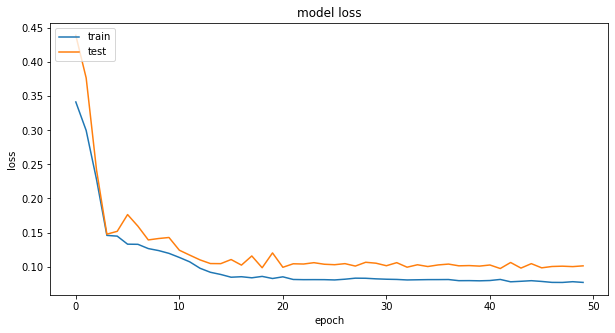

MAE 0.10105182193703192
MSE 0.018194123434661414
RMSE 0.13488559387370253
R2 0.5109392760577336


In [ ]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
import math
from math import sqrt
from pandas import concat
  
# create and fit the LSTM network
model_stack = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_stack.add(LSTM(units = 80, return_sequences = True, input_shape=(trainX.shape[1], trainX.shape[2])))
model_stack.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_stack.add(LSTM(units = 100, return_sequences = True))
model_stack.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_stack.add(LSTM(units = 100, return_sequences = True))
model_stack.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_stack.add(LSTM(units = 50))
model_stack.add(Dropout(0.2))

# Adding the output layer
model_stack.add(Dense(units = 1))

model_stack.compile(loss='mae', optimizer='adam')

# fit network
history_stack = model_stack.fit(trainX, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=False)

# history for loss
plt.figure(figsize = (10,5))
plt.plot(history_stack.history['loss']) 
plt.plot(history_stack.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
# prediction on test data
y_pred = model_stack.predict(testX) 
# invert the test to original values
y_test_inverse = DataFrame(ss.inverse_transform(testY)) 
# assigning datetime
y_test_inverse.index = pjme.index[-len(testY):] 
  
print(f'MAE {mean_absolute_error(testY, y_pred)}')
print(f'MSE {mean_squared_error(testY, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(testY, y_pred))}')
print(f'R2 {r2_score(testY, y_pred)}')

**Forecast future values using Stacked LSTM**

In [ ]:
# Forecast
predict_scaled = model_stack.predict(testX)
forecast_stack = ss.inverse_transform(predict_scaled)
 
forecast_stack = pd.DataFrame(forecast_stack)
forecast_stack.columns = ['Future_Values_Stack']

print(forecast_stack)

     Future_Values_Stack
0              5333634.0
1              5278972.0
2              5012434.5
3              5032061.5
4              5107866.0
..                   ...
204            5734388.5
205            6032106.5
206            5948613.0
207            5931480.0
208            5948259.0

[209 rows x 1 columns]


**BIDIRECTIONAL LSTM**

On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

**TimeseriesGenerator for Time Series Forecasting** 

Epoch 1/100
5/5 [==============================] - 12s 560ms/step - loss: 0.1574 - val_loss: 0.1224
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1466 - val_loss: 0.1134
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1361 - val_loss: 0.1044
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.1252 - val_loss: 0.0954
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1147 - val_loss: 0.0861
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1029 - val_loss: 0.0767
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0913 - val_loss: 0.0670
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0790 - val_loss: 0.0573
Epoch 9/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0664 - val_loss: 0.0479
Epoch 10/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0395
Epoch 11/100
5/5 

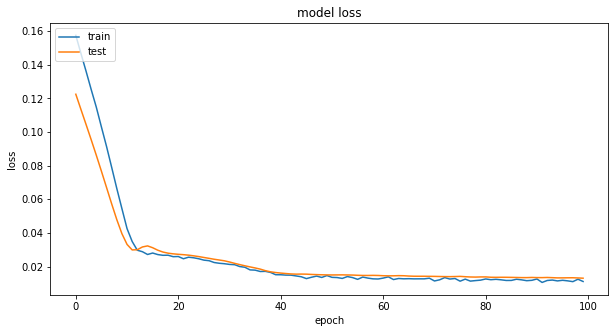

MAE 0.10292008377700833
MSE 0.018795851901585517
RMSE 0.13709796461503546
R2 0.4947647260329745


In [ ]:
from keras.layers import Bidirectional

# reshape input to be [samples, time steps, features]

DROPOUT = 0.2 
BATCH_SIZE = 128

# 20% Dropout is used to control over-fitting during training
WINDOW_SIZE = n_steps - 1
model_bi = Sequential()
# Input layer
model_bi.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True), input_shape=(WINDOW_SIZE, trainX.shape[-1])))

"""Bidirectional RNNs allows to train on the sequence data in forward and backward direction."""
model_bi.add(Dropout(rate=DROPOUT))
# 1st Hidden layer
model_bi.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences = True)))
model_bi.add(Dropout(rate=DROPOUT))
# 2nd Hidden layer
model_bi.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))
# output layer
model_bi.add(Dense(units=1))
model_bi.add(Activation('linear'))

"""Output layer has a single neuron (predicted Bitcoin price). We use Linear activation function which activation is proportional to the input."""
  
model_bi.compile(loss='mean_squared_error', optimizer='adam')
history_bi = model_bi.fit(trainX, trainY, epochs=100, batch_size=BATCH_SIZE, shuffle=False, validation_split=0.1) 
# shuffle not advisable during training of Time Series

# history for loss
plt.figure(figsize = (10,5))
plt.plot(history_bi.history['loss'])
plt.plot(history_bi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
  
# PREDICTION

# prediction on test data
y_pred = model_bi.predict(testX) 
# invert the test to original values
y_test_inverse = DataFrame(ss.inverse_transform(testY)) 
# assigning datetime
y_test_inverse.index = pjme.index[-len(testY):]

print(f'MAE {mean_absolute_error(testY, y_pred)}')
print(f'MSE {mean_squared_error(testY, y_pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(testY, y_pred))}')
print(f'R2 {r2_score(testY, y_pred)}')

**Forecast future values using Bidirectional LSTM**

In [ ]:
# Forecast
predict_scaled = model_bi.predict(testX)
forecast_bi = ss.inverse_transform(predict_scaled)
 
forecast_bi = pd.DataFrame(forecast_bi)
forecast_bi.columns = ['Future_Values_BI']

print(forecast_bi)

     Future_Values_BI
0           5382066.0
1           5197853.0
2           4930318.5
3           4936325.0
4           4961952.0
..                ...
204         5663617.5
205         5890169.5
206         5904884.0
207         5919714.5
208         5956152.0

[209 rows x 1 columns]


In [ ]:
# Combine all df together
forecast_df = pd.concat([forecast_van,forecast_stack,forecast_bi],axis=1, ignore_index=True)
forecast_df.columns = ['Future_Values_Van','Future_Values_Stack','Future_Values_BI']

forecast_df

Future_Values_Van  Future_Values_Stack  Future_Values_BI
0            5317811.0            5333634.0         5382066.0
1            5344573.5            5278972.0         5197853.0
2            5033344.0            5012434.5         4930318.5
3            5082934.0            5032061.5         4936325.0
4            5167260.0            5107866.0         4961952.0
..                 ...                  ...               ...
204          5877696.0            5734388.5         5663617.5
205          6206390.5            6032106.5         5890169.5
206          6016209.5            5948613.0         5904884.0
207          6022458.5            5931480.0         5919714.5
208          6064277.5            5948259.0         5956152.0

[209 rows x 3 columns]

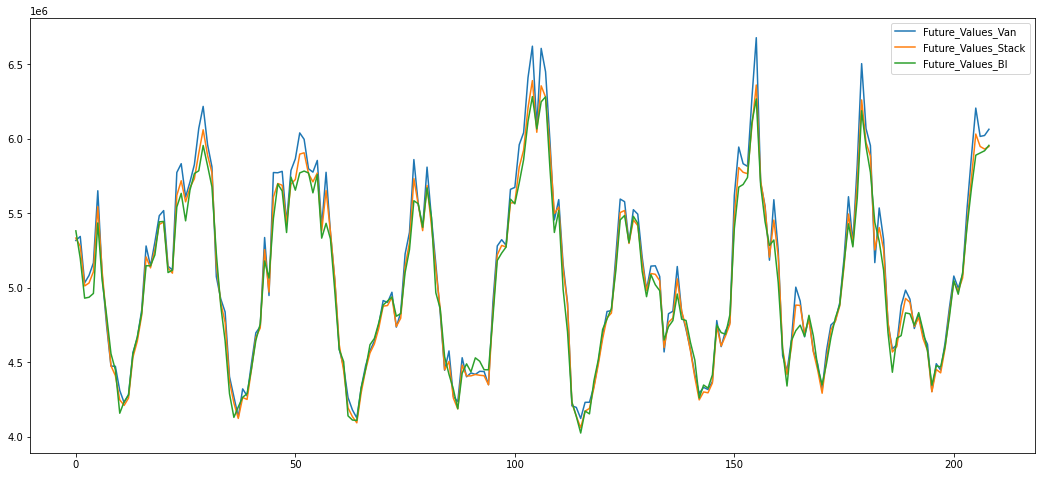

In [ ]:
forecast_df.plot()

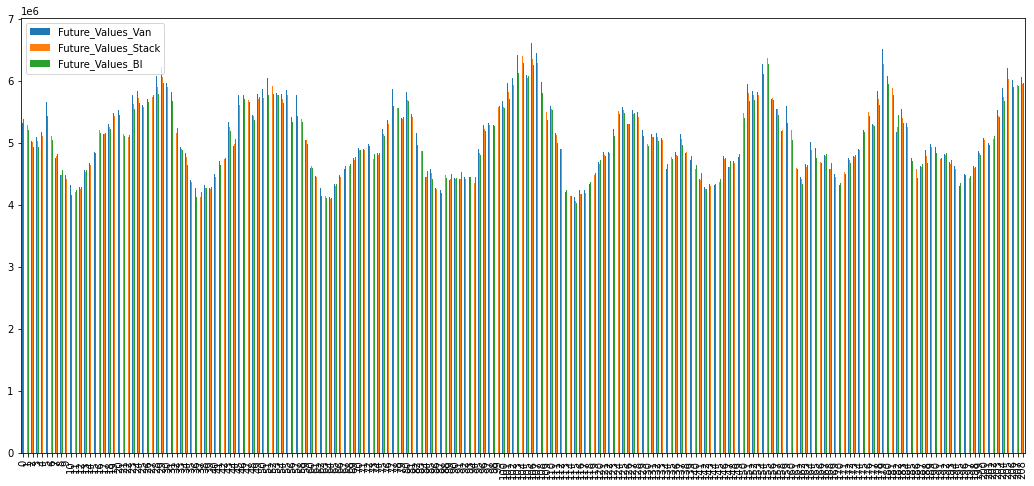

In [ ]:
forecast_df.plot.bar();

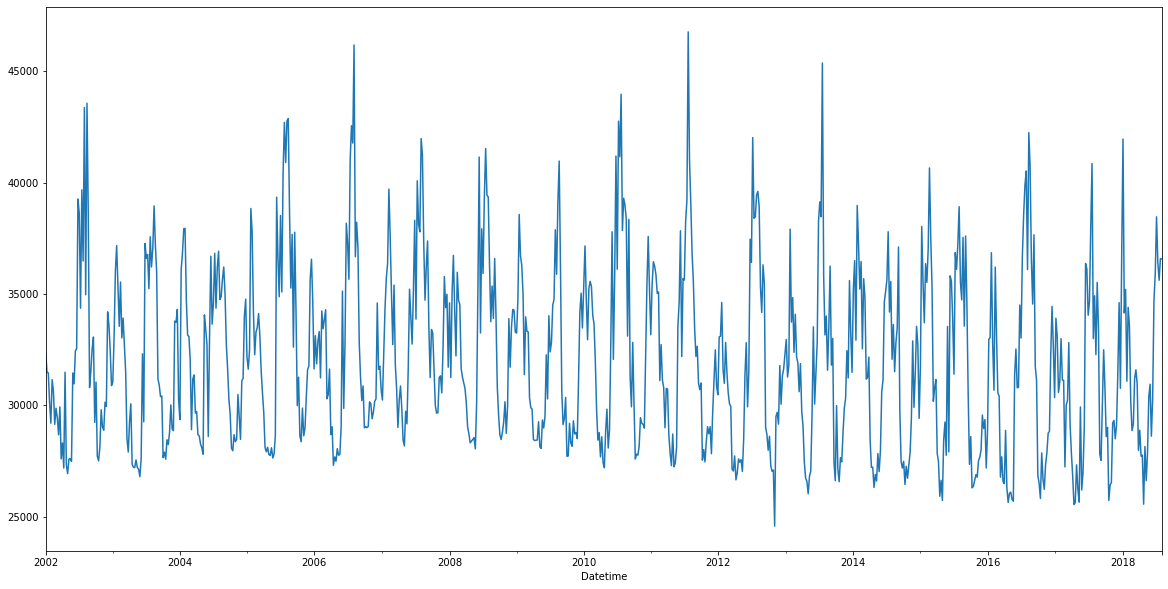

In [ ]:
daily_groups = pjme['PJME_MW'].resample('W').mean()
daily_groups.plot(figsize=(20,10))
plt.show()

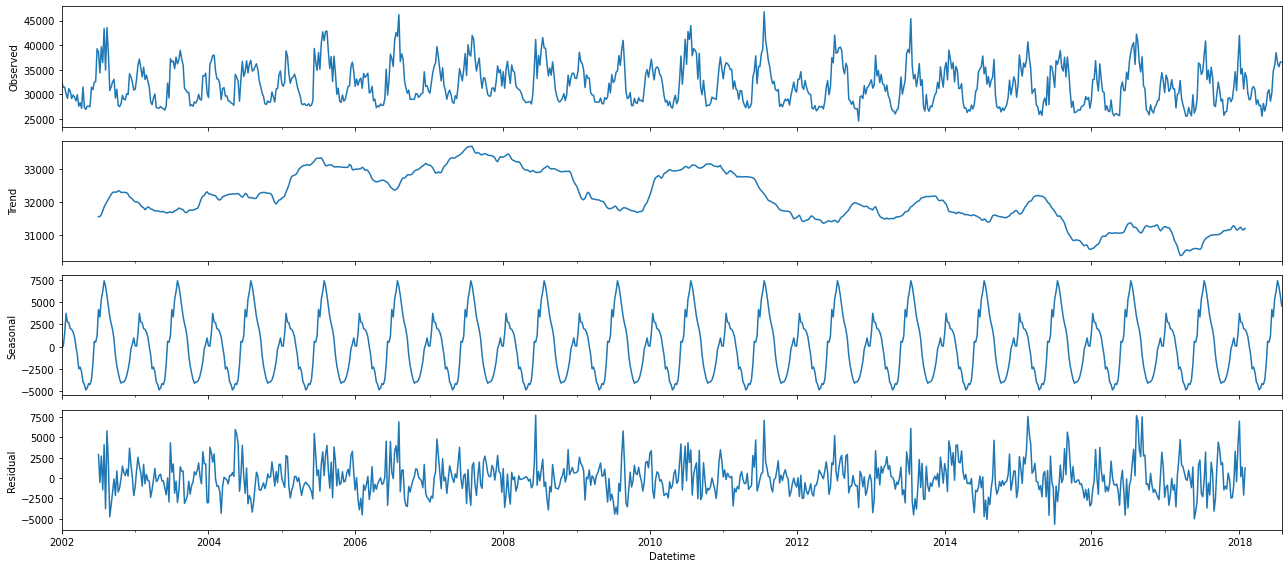

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(daily_groups, model='additive')
fig = decomposition.plot()
plt.show()

**Time Series forecasting with SARIMAX**

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_groups,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:20420.549408635863
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:19647.906132144533
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:17541.041076768928
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16870.580161311686
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:17553.95882193969
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:17168.669999902806
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16329.683524606055
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16312.236287961654
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:19778.538742695644
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19374.259041400575
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:17057.83898765635
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16577.806617933195
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:19329.86178862954
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:19278.551443915505
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16057.25643315113
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:15985.359044322762
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16022.719749042324
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15798.821557150

In [ ]:
mod = sm.tsa.statespace.SARIMAX(daily_groups,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0426      0.142      0.300      0.764      -0.236       0.321
ma.L1         -0.4171      0.135     -3.088      0.002      -0.682      -0.152
ar.S.L12      -0.6790      0.043    -15.904      0.000      -0.763      -0.595
sigma2      1.463e+07   9.79e+05     14.949      0.000    1.27e+07    1.65e+07


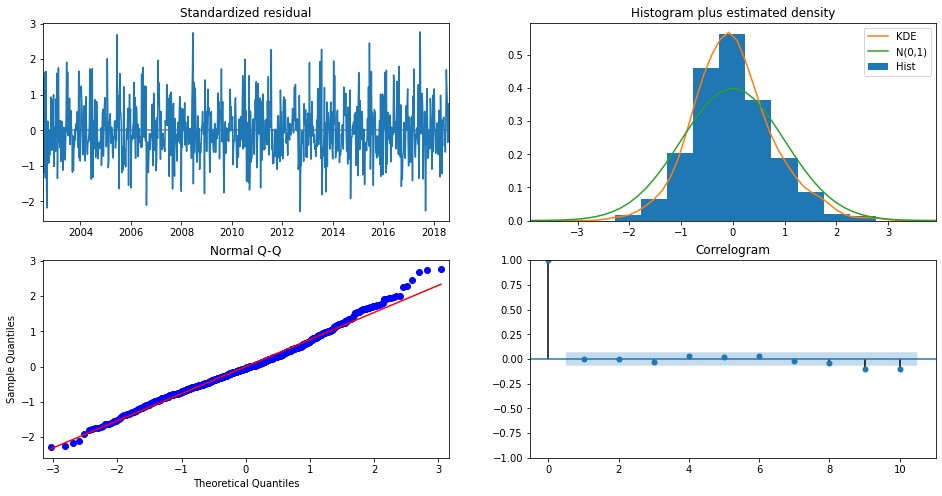

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Validating Forecast**

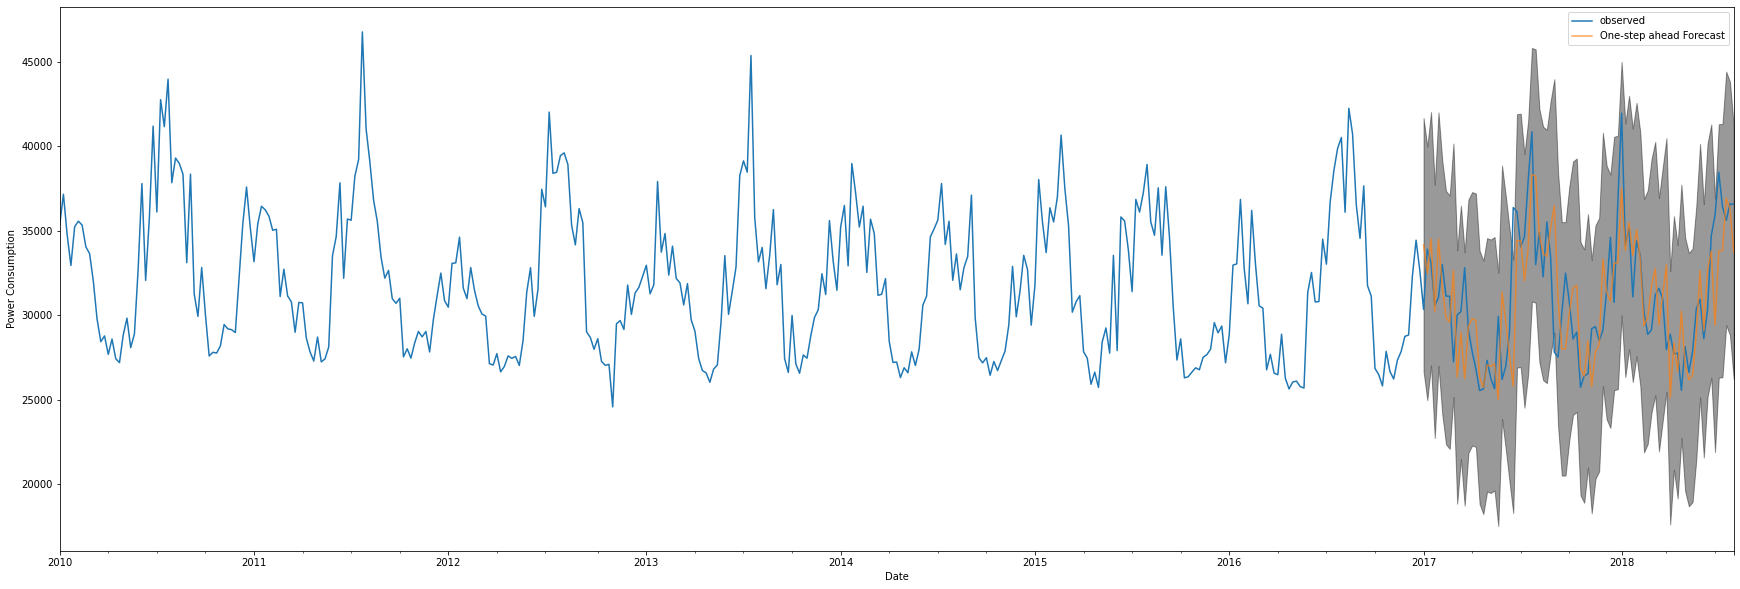

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = daily_groups['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(30,10))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.4)

ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = daily_groups['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6460236.4


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2541.7


**Producing and visualizing forecasts**

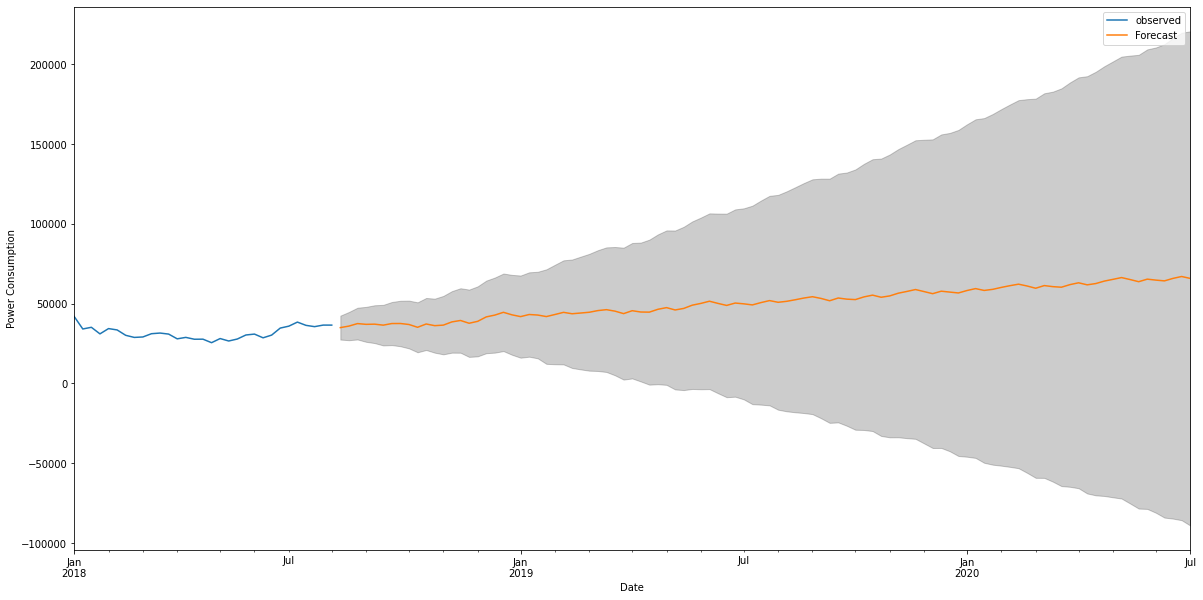

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = daily_groups['2018'].plot(label='observed', figsize=(20,10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

plt.legend()
plt.show()